# GCNによるKarateclub埋め込み

デフォルトはノード0,4,8,24が教師データ

! conda activate kmedoids

In [1]:

import time
import networkx as nx
from torch_geometric.utils.convert import to_networkx, from_networkx
from torch_geometric.datasets import KarateClub
import matplotlib.pyplot as plt
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import gcn
from gcn import GCN
import numpy as np
from sklearn_extra.cluster import KMedoids #K-Medoids
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score #ARI
import random
import sys
from statistics import stdev
import warnings

warnings.filterwarnings("ignore")


/opt/anaconda3/envs/kmedoids/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LOUVAIN = "LOUVAIN"
KARATE = "KARATE"
K4 = "K4"

In [3]:
# 実行回数
TIMES = 100

#すべてを学習データで学習させるか
TRAIN_ALL = False 

# デフォルトの一部の学習データ(ノード0,4,8,24)で学習させるか。Falseの場合ランダム
DEFAULT = False

#ランダムのデータで学習する場合の学習データ(ノード情報)数
NUM_TRAIN = 4

#エポック数
EPOCH = 50

#学習状況及び結果を図示するか
VIEW_TRAIN = False

#埋め込み結果、クラスタリング結果を表示するか
VIEW_CLUSTERING = True

#  クラスタ数
N_CLUSTER = 2

#GCNの学習に使う教師データ
TRUE_LABEL = gcn.draw_karateclub()

#クラスタリングに用いる手法
METHOD = "kmeans"

DATA = gcn.generate_Graph("karateclub")

#==========================================================

# 学習に用いるノードの数
num_node_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 34]

# エポック数
epoch_list = [200]



===========================1回目============================
埋め込み結果


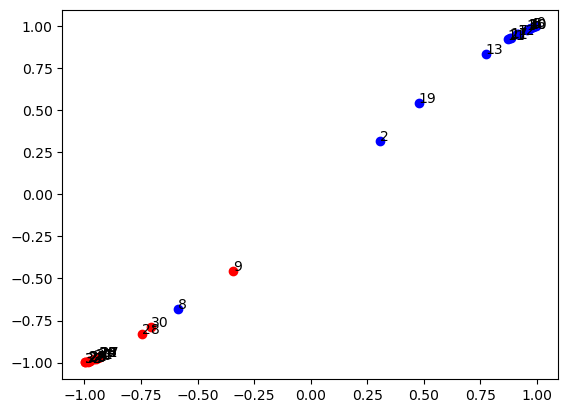

クラスタリング結果


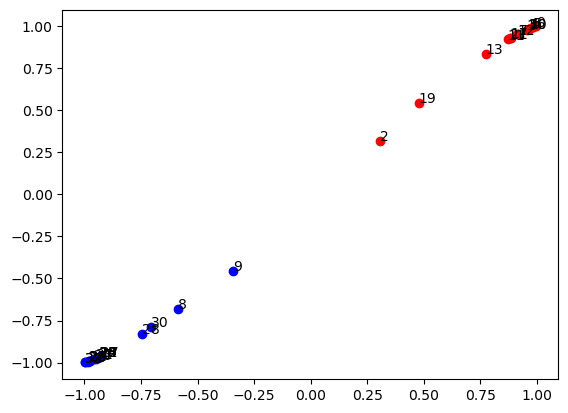

1回目 ARI : 0.8822575413558222
===========================2回目============================
埋め込み結果


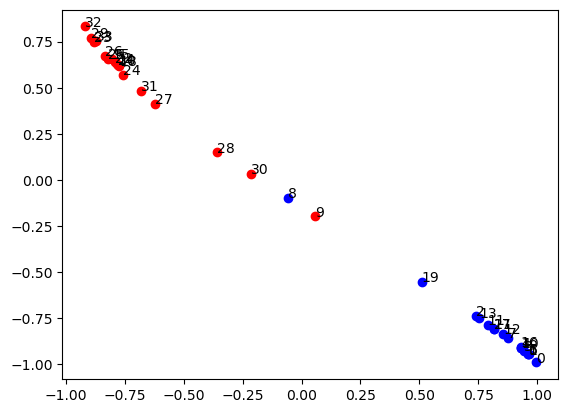

クラスタリング結果


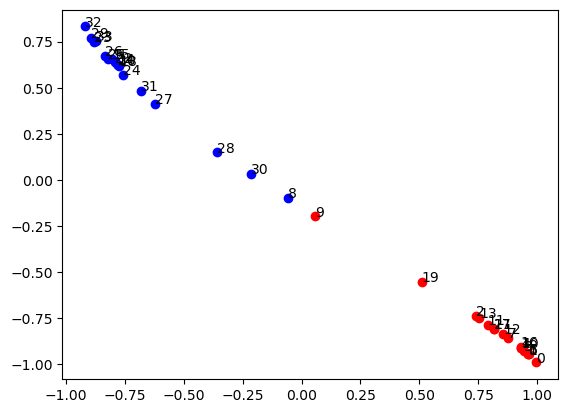

2回目 ARI : 0.7716262975778547
===========================3回目============================
埋め込み結果


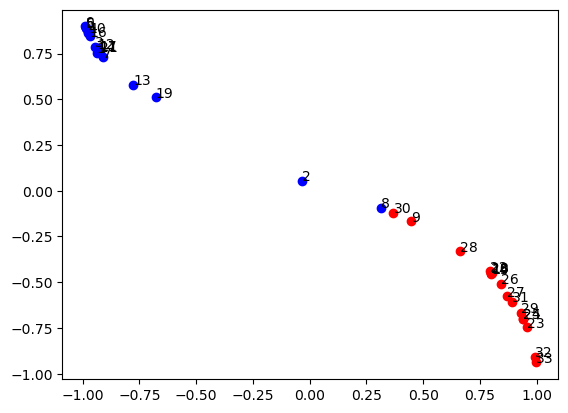

クラスタリング結果


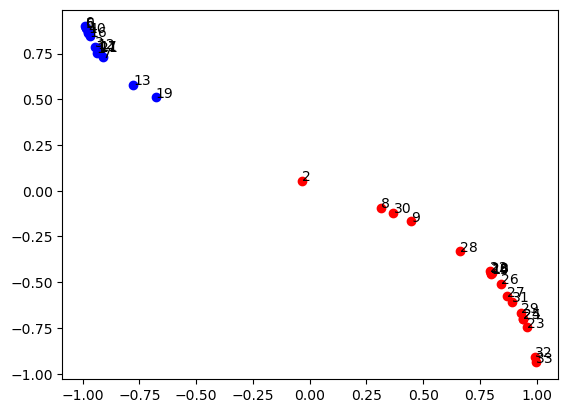

3回目 ARI : 0.7717250324254216
===========================4回目============================
埋め込み結果


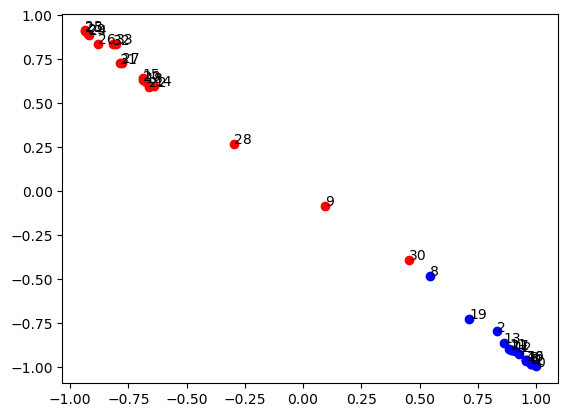

クラスタリング結果


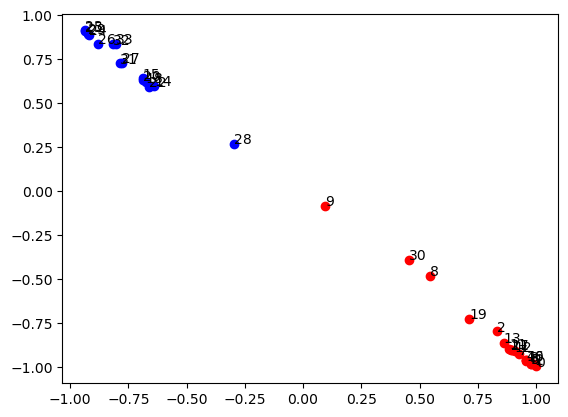

4回目 ARI : 0.7717250324254216
===========================5回目============================
埋め込み結果


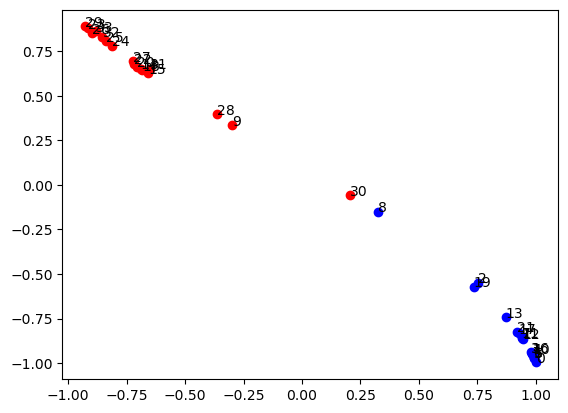

クラスタリング結果


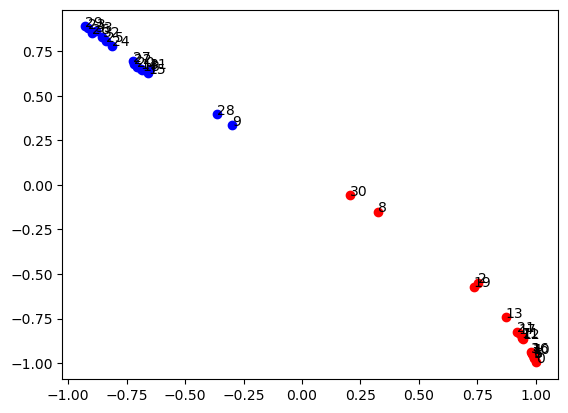

5回目 ARI : 0.8822575413558222
===========================6回目============================
埋め込み結果


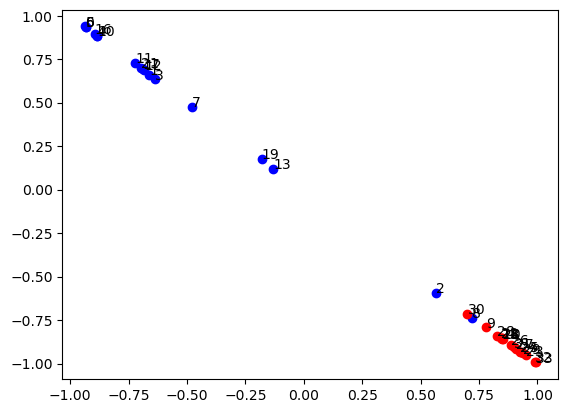

クラスタリング結果


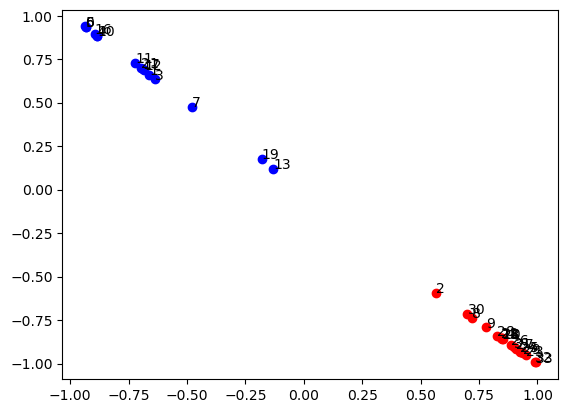

6回目 ARI : 0.7717250324254216
===========================7回目============================
埋め込み結果


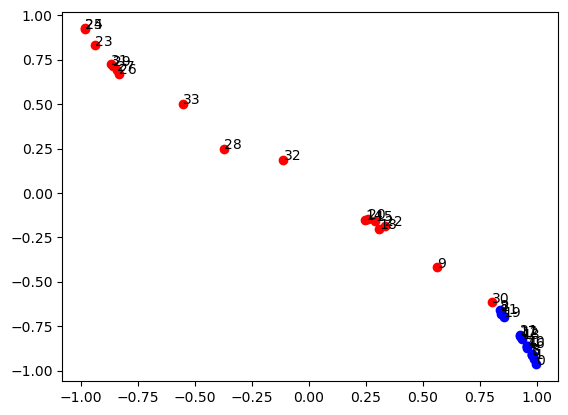

クラスタリング結果


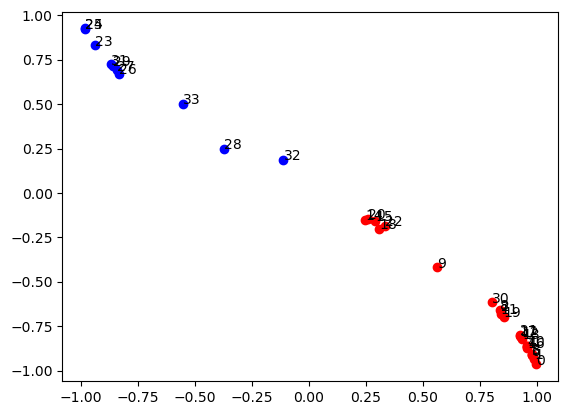

7回目 ARI : 0.3291384317521781
===========================8回目============================
埋め込み結果


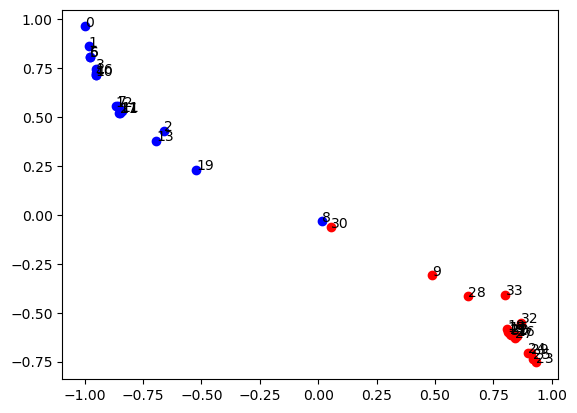

クラスタリング結果


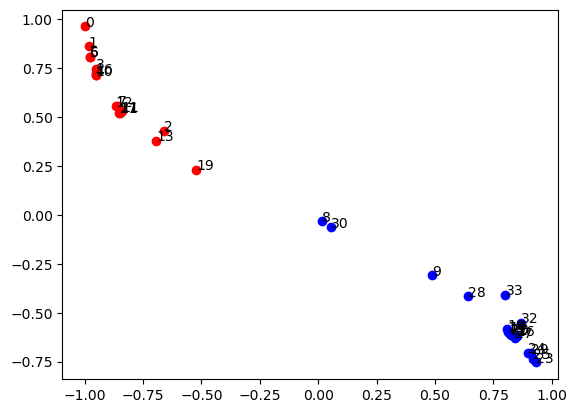

8回目 ARI : 0.8822575413558222
===========================9回目============================
埋め込み結果


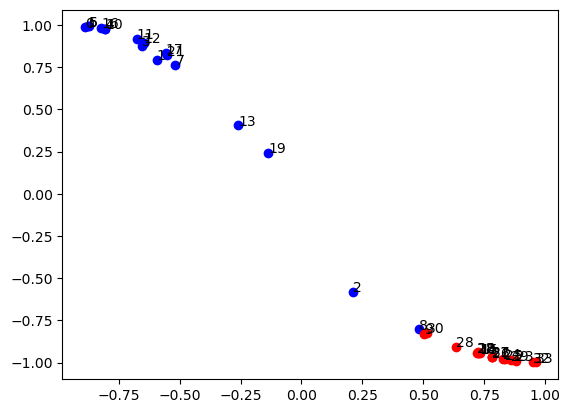

クラスタリング結果


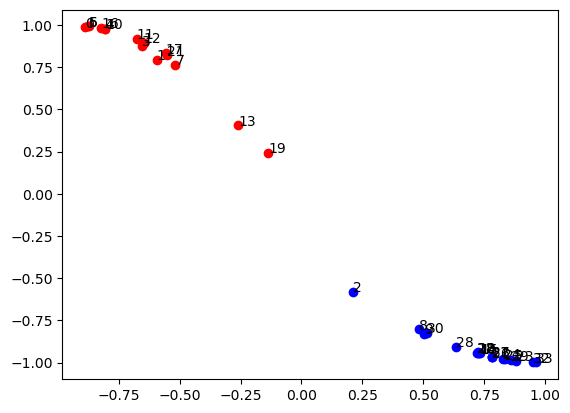

9回目 ARI : 0.7717250324254216
===========================10回目============================
埋め込み結果


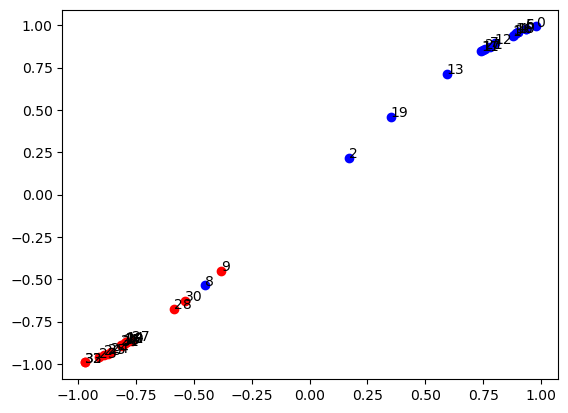

クラスタリング結果


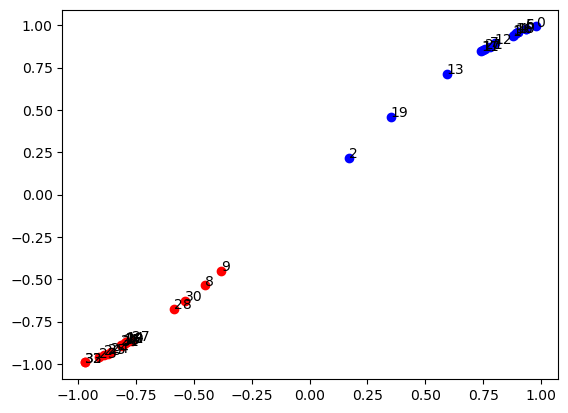

10回目 ARI : 0.8822575413558222
===========================11回目============================
埋め込み結果


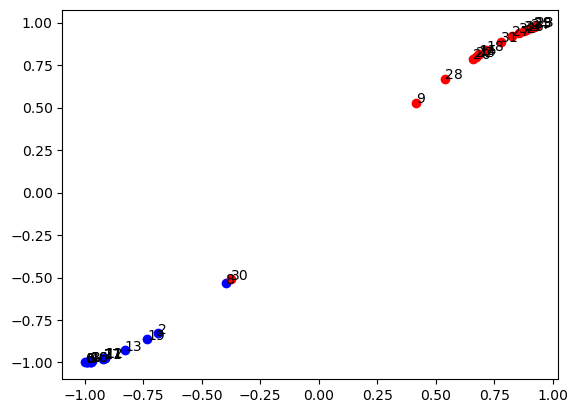

クラスタリング結果


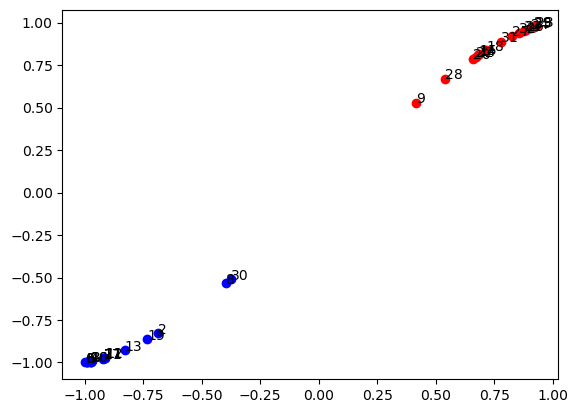

11回目 ARI : 0.8822575413558222
===========================12回目============================
埋め込み結果


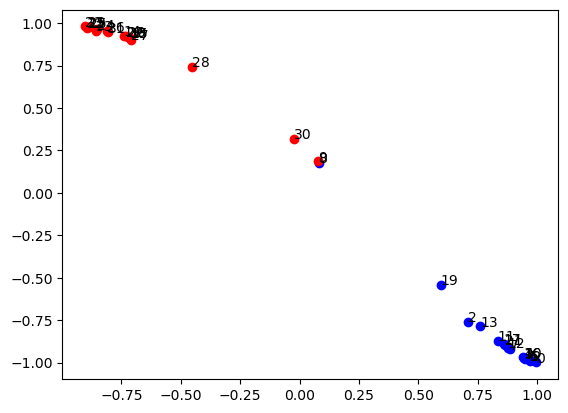

クラスタリング結果


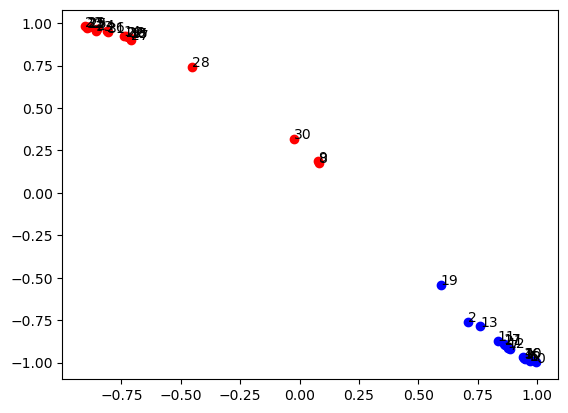

12回目 ARI : 0.8822575413558222
===========================13回目============================
埋め込み結果


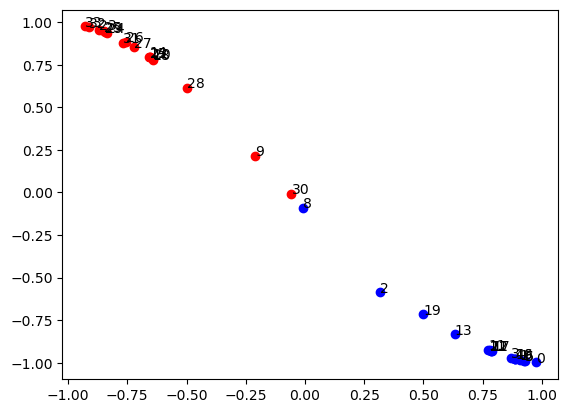

クラスタリング結果


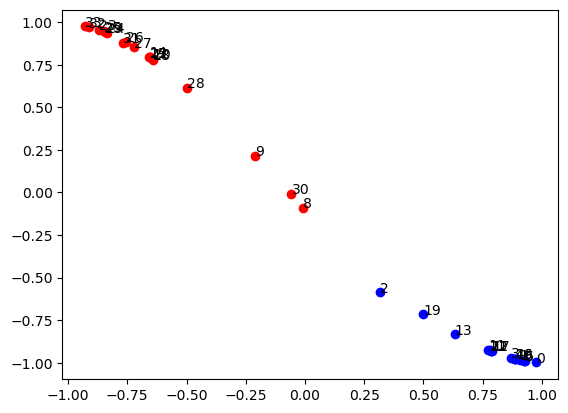

13回目 ARI : 0.8822575413558222
===========================14回目============================
埋め込み結果


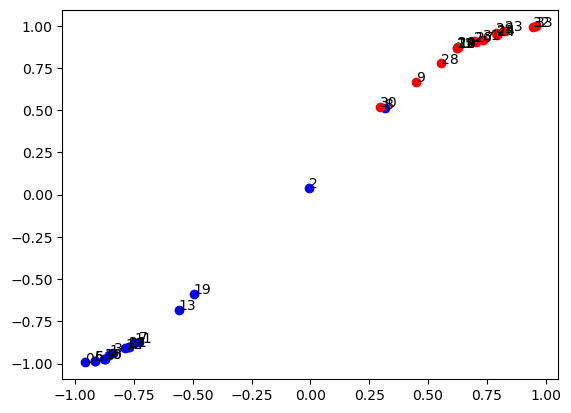

クラスタリング結果


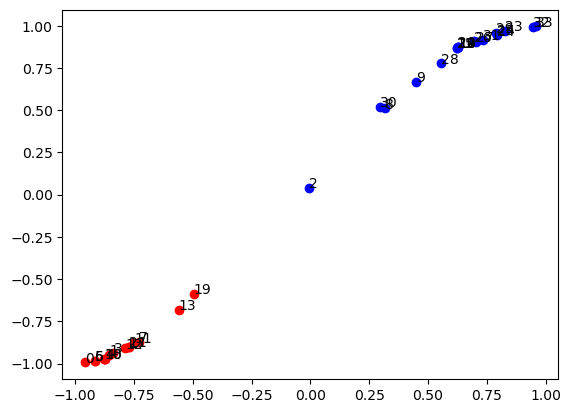

14回目 ARI : 0.7717250324254216
===========================15回目============================
埋め込み結果


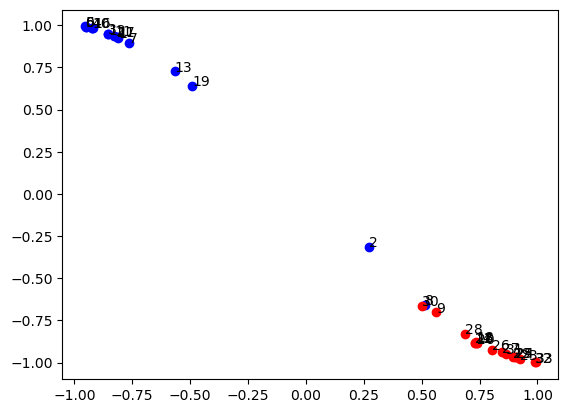

クラスタリング結果


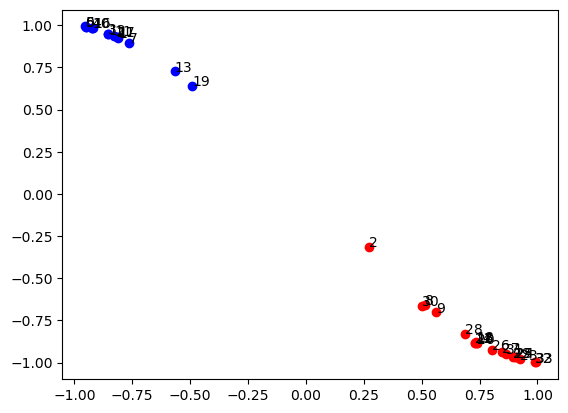

15回目 ARI : 0.7717250324254216
===========================16回目============================
埋め込み結果


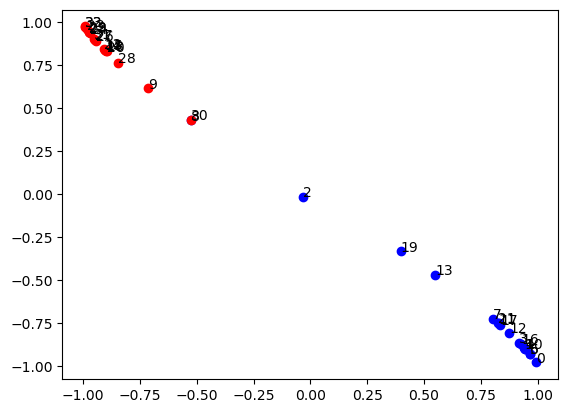

クラスタリング結果


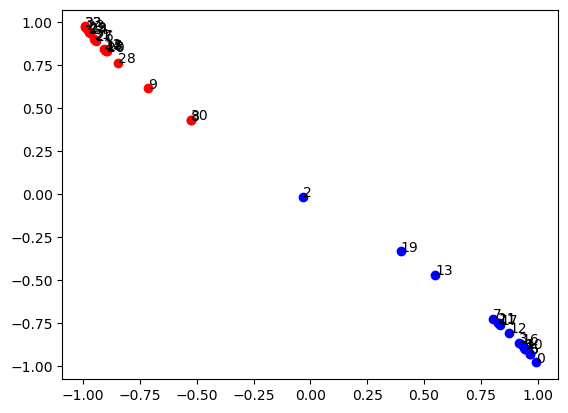

16回目 ARI : 0.8822575413558222
===========================17回目============================
埋め込み結果


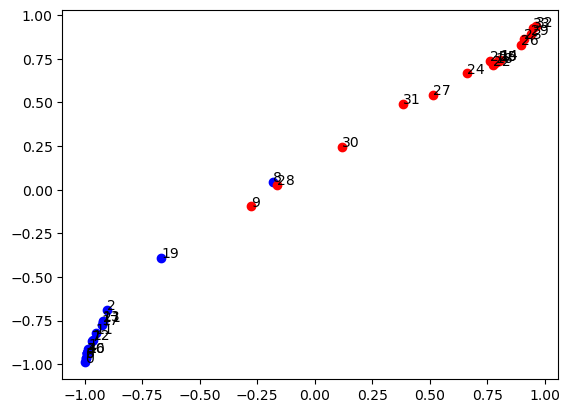

クラスタリング結果


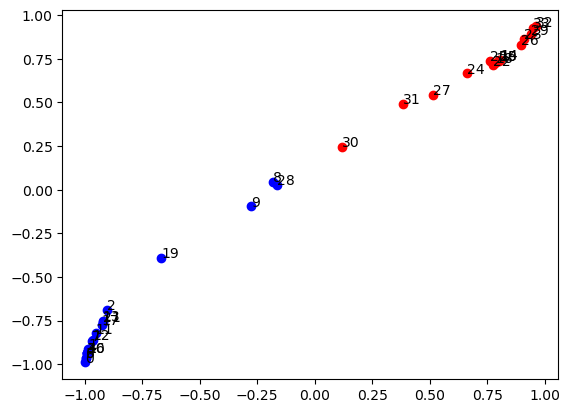

17回目 ARI : 0.7717250324254216
===========================18回目============================
埋め込み結果


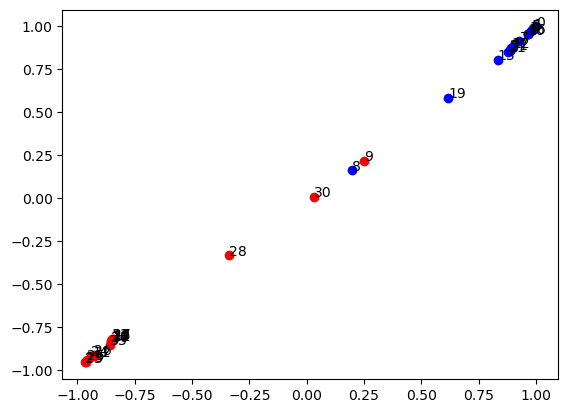

クラスタリング結果


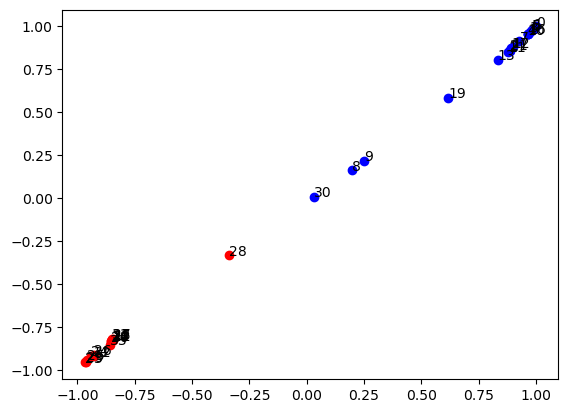

18回目 ARI : 0.7717250324254216
===========================19回目============================
埋め込み結果


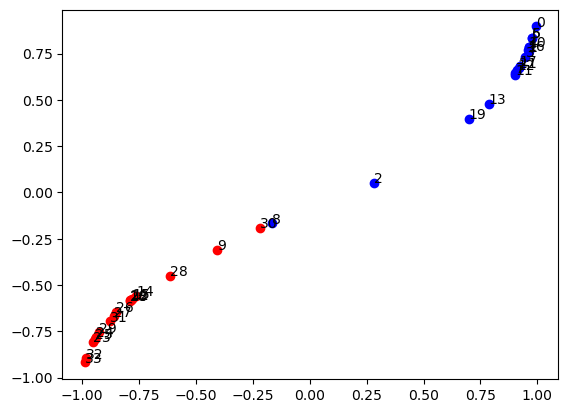

クラスタリング結果


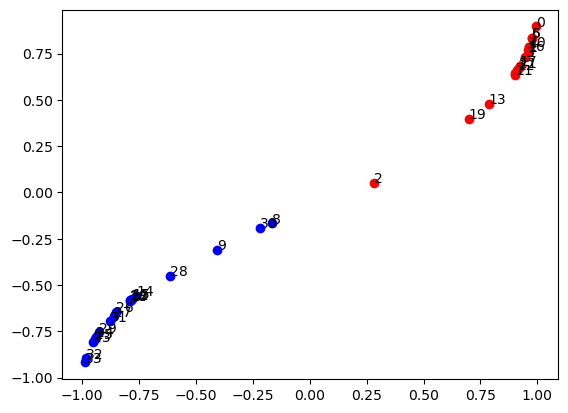

19回目 ARI : 0.8822575413558222
===========================20回目============================
埋め込み結果


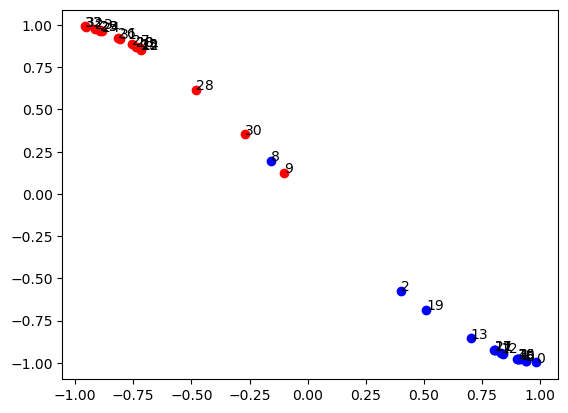

クラスタリング結果


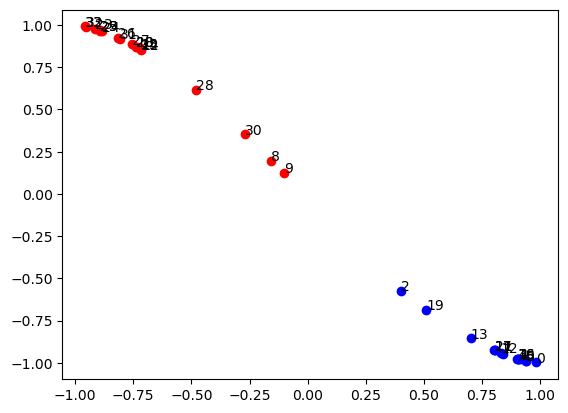

20回目 ARI : 0.8822575413558222
===========================21回目============================
埋め込み結果


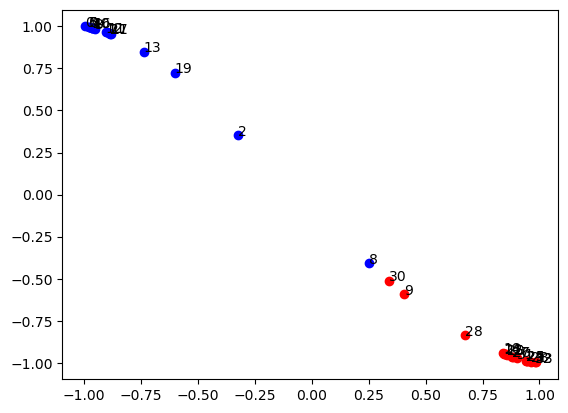

クラスタリング結果


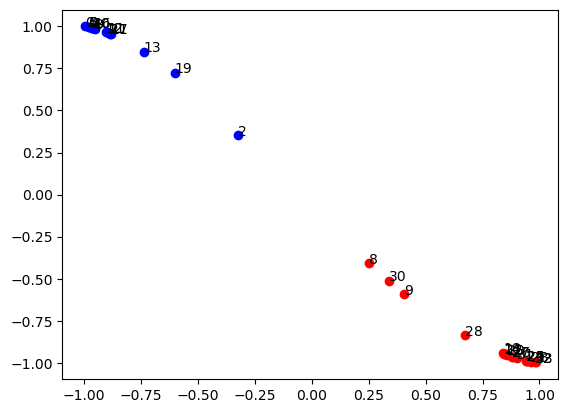

21回目 ARI : 0.8822575413558222
===========================22回目============================
埋め込み結果


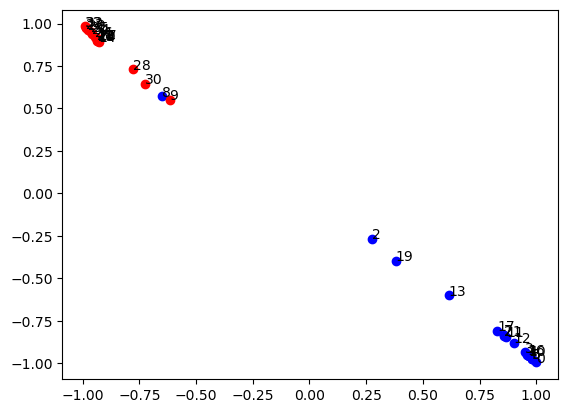

クラスタリング結果


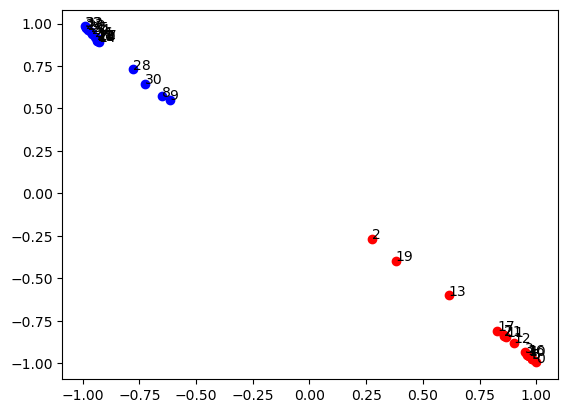

22回目 ARI : 0.8822575413558222
===========================23回目============================
埋め込み結果


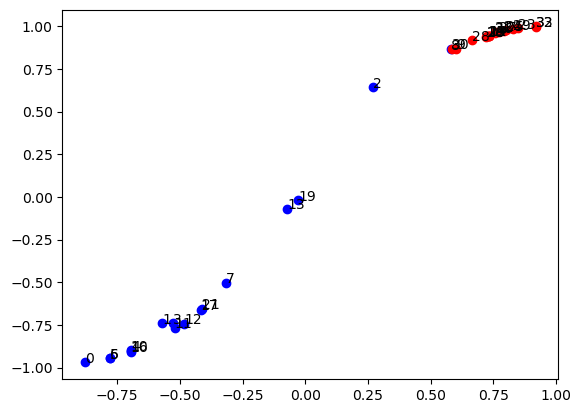

クラスタリング結果


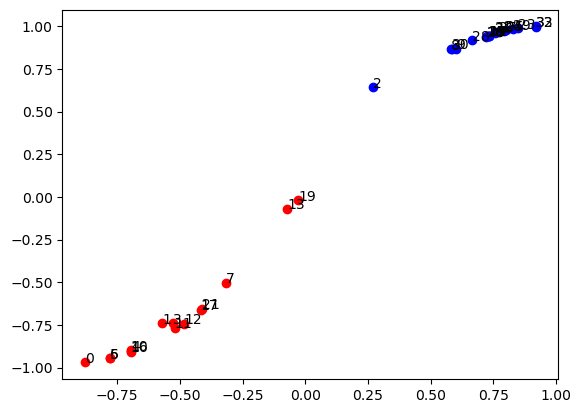

23回目 ARI : 0.7717250324254216
===========================24回目============================
埋め込み結果


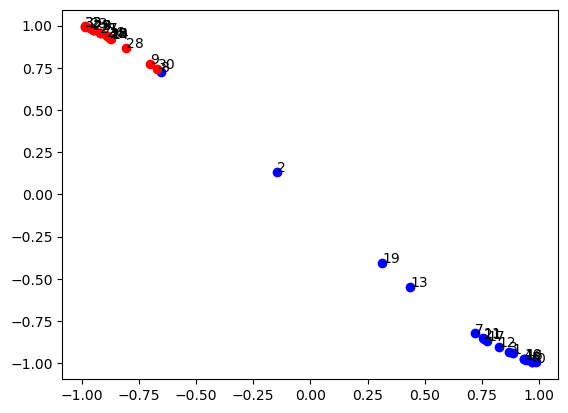

クラスタリング結果


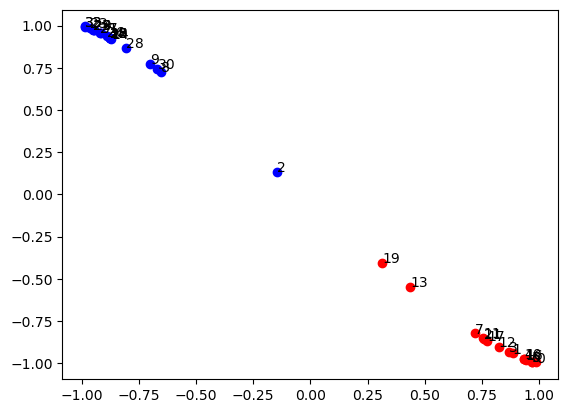

24回目 ARI : 0.7717250324254216
===========================25回目============================
埋め込み結果


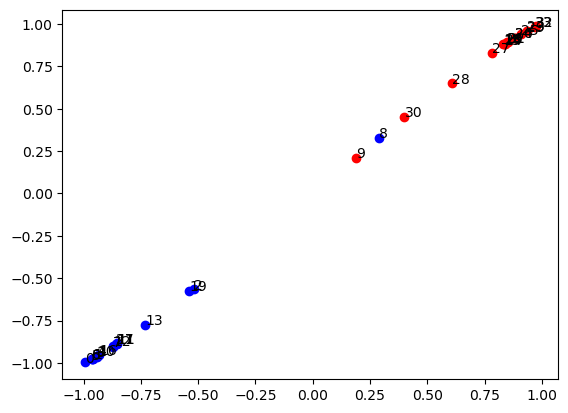

クラスタリング結果


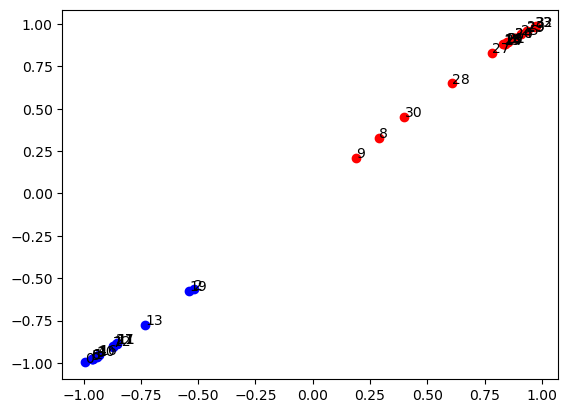

25回目 ARI : 0.8822575413558222
===========================26回目============================
埋め込み結果


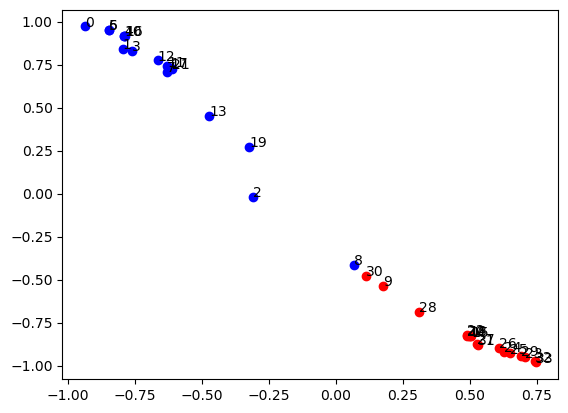

クラスタリング結果


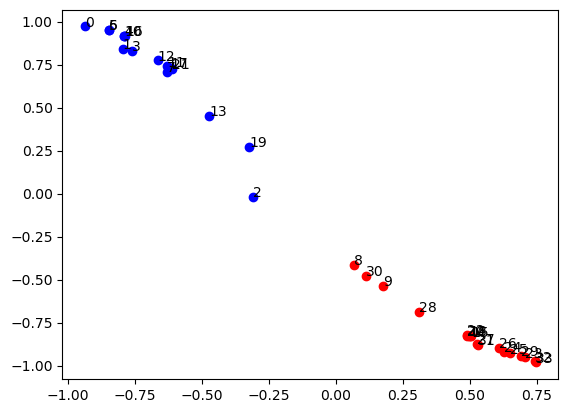

26回目 ARI : 0.8822575413558222
===========================27回目============================
埋め込み結果


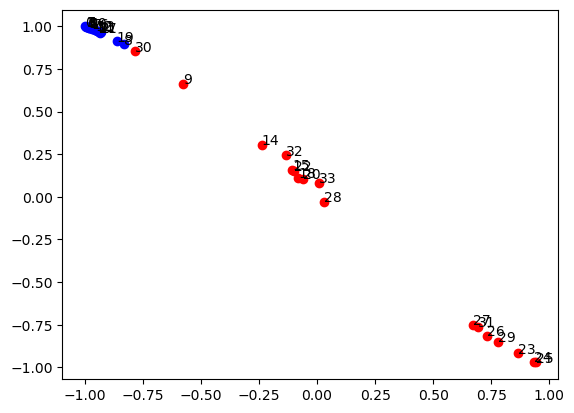

クラスタリング結果


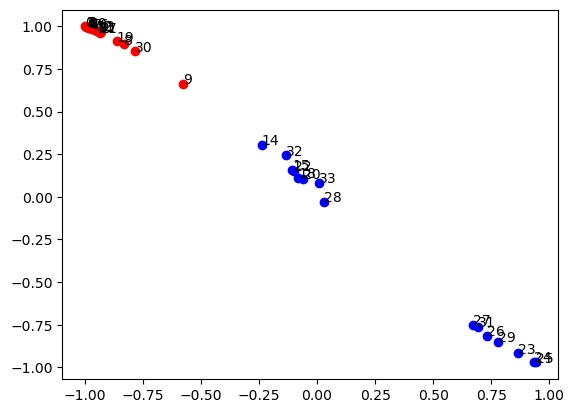

27回目 ARI : 0.7717250324254216
===========================28回目============================
埋め込み結果


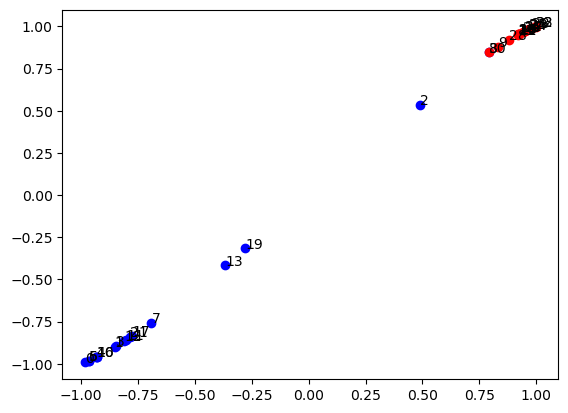

クラスタリング結果


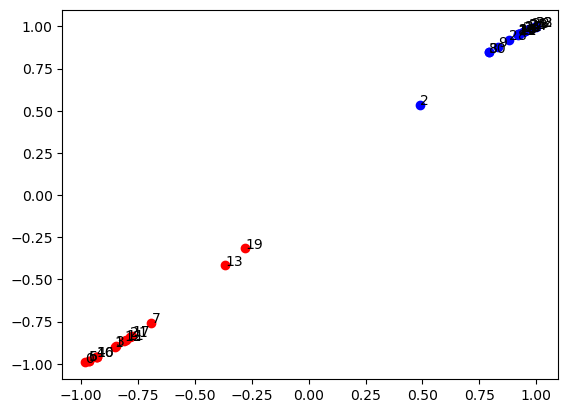

28回目 ARI : 0.7717250324254216
===========================29回目============================
埋め込み結果


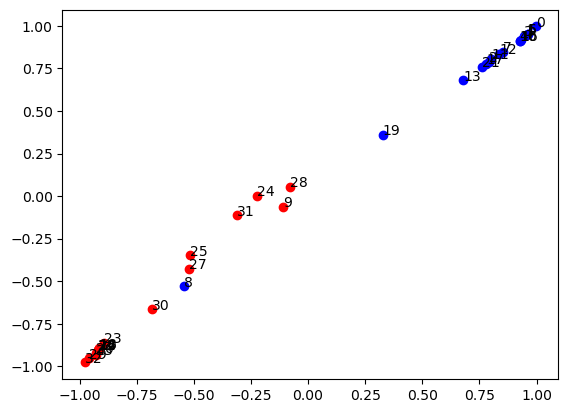

クラスタリング結果


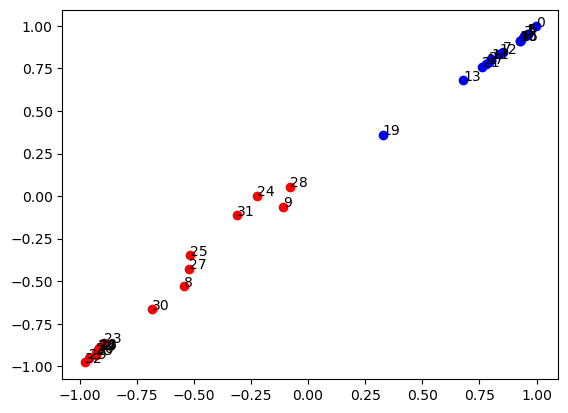

29回目 ARI : 0.8822575413558222
===========================30回目============================
埋め込み結果


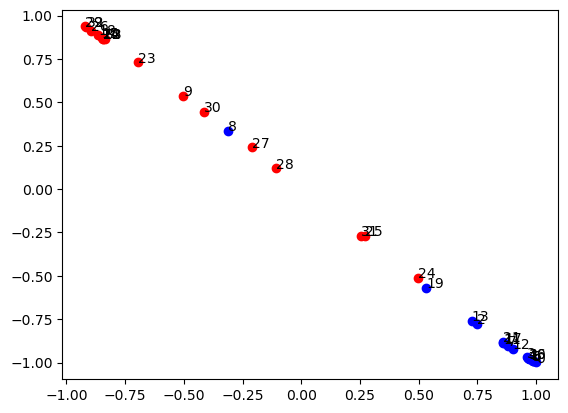

クラスタリング結果


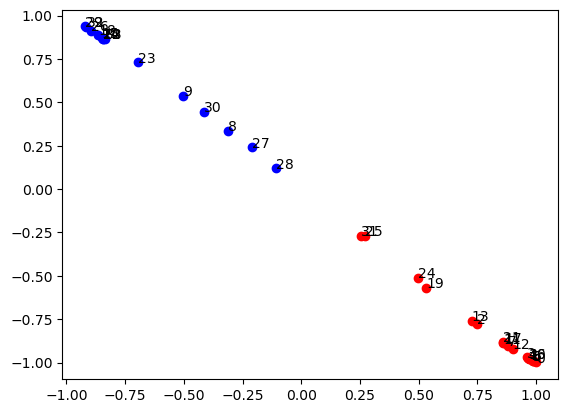

30回目 ARI : 0.5719844357976653
===========================31回目============================
埋め込み結果


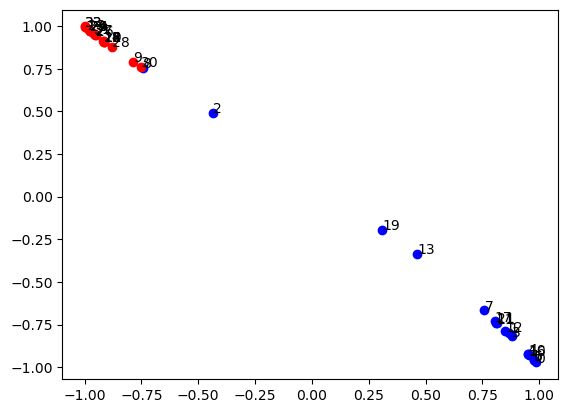

クラスタリング結果


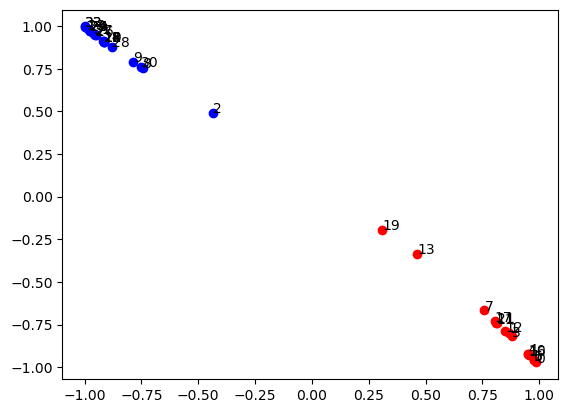

31回目 ARI : 0.7717250324254216
===========================32回目============================
埋め込み結果


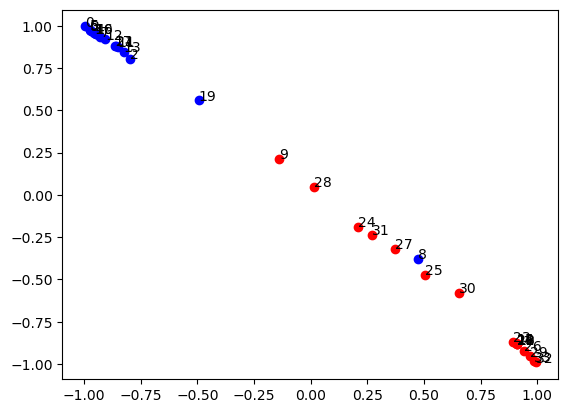

クラスタリング結果


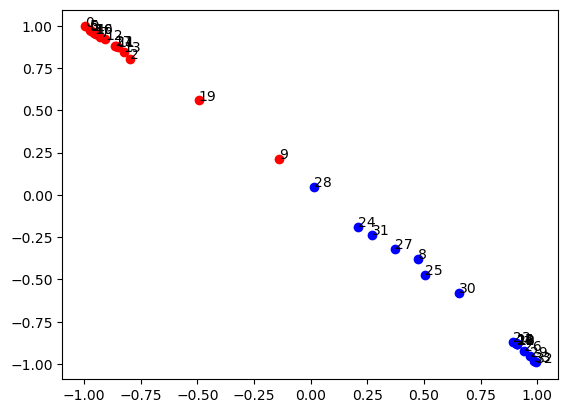

32回目 ARI : 0.7716262975778547
===========================33回目============================
埋め込み結果


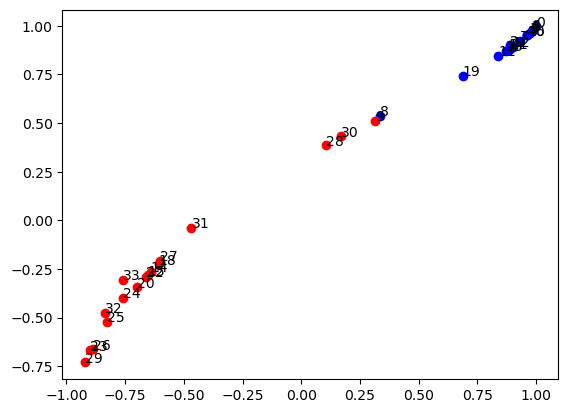

クラスタリング結果


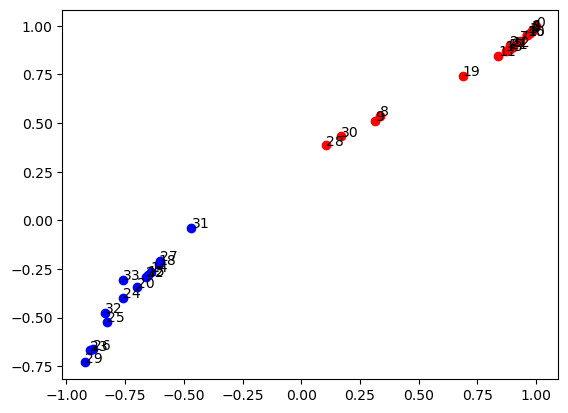

33回目 ARI : 0.6684671059738576
===========================34回目============================
埋め込み結果


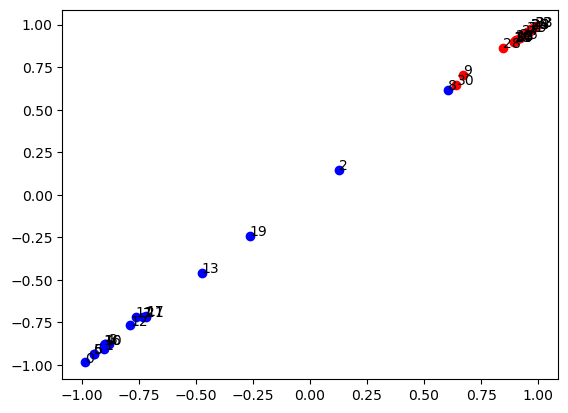

クラスタリング結果


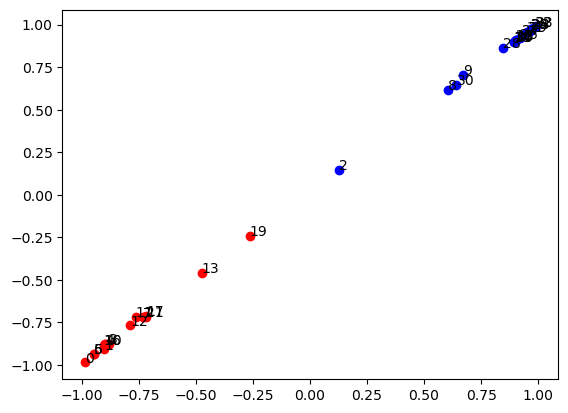

34回目 ARI : 0.7717250324254216
===========================35回目============================
埋め込み結果


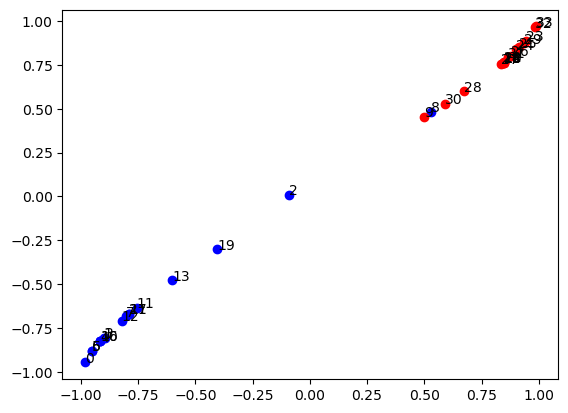

クラスタリング結果


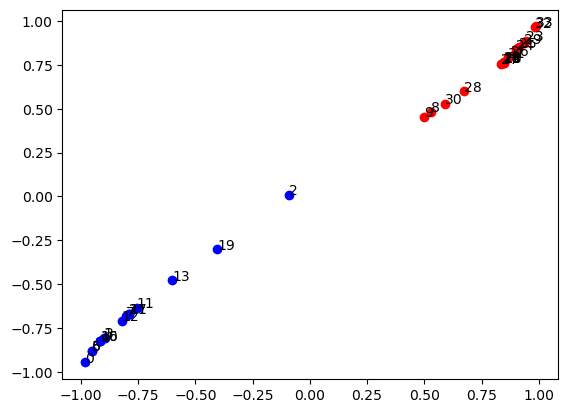

35回目 ARI : 0.8822575413558222
===========================36回目============================
埋め込み結果


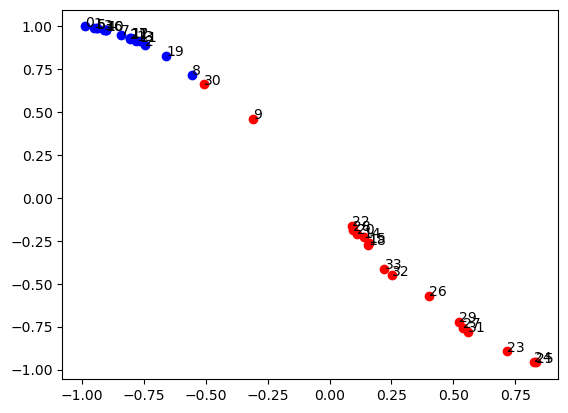

クラスタリング結果


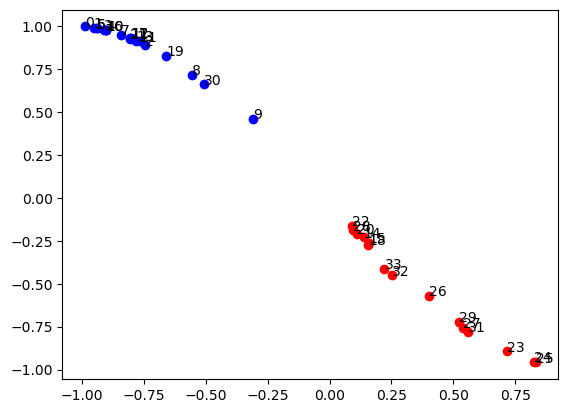

36回目 ARI : 0.7717250324254216
===========================37回目============================
埋め込み結果


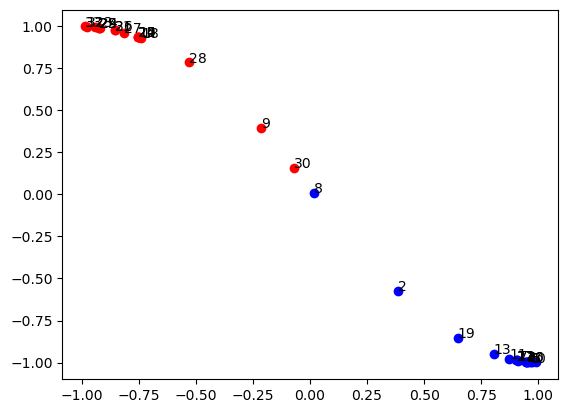

クラスタリング結果


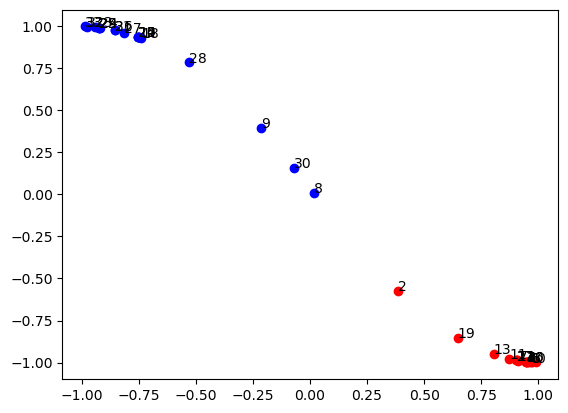

37回目 ARI : 0.8822575413558222
===========================38回目============================
埋め込み結果


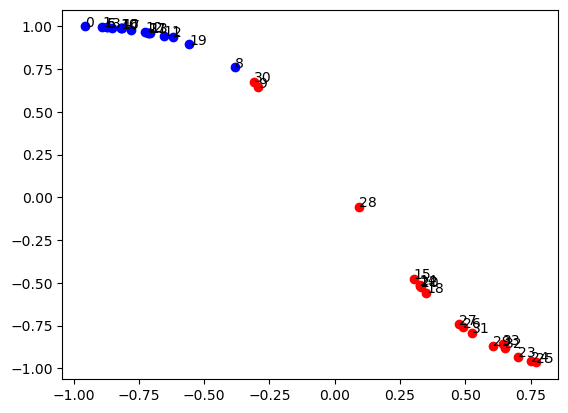

クラスタリング結果


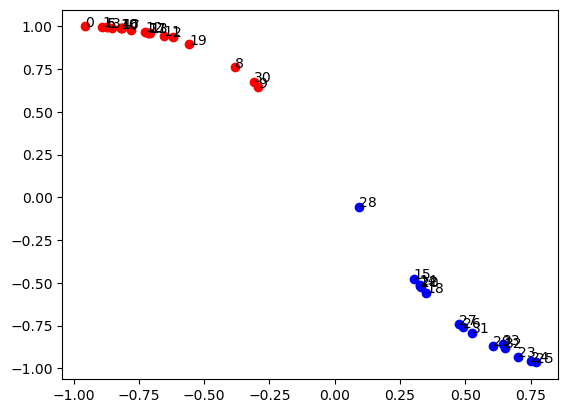

38回目 ARI : 0.7717250324254216
===========================39回目============================
埋め込み結果


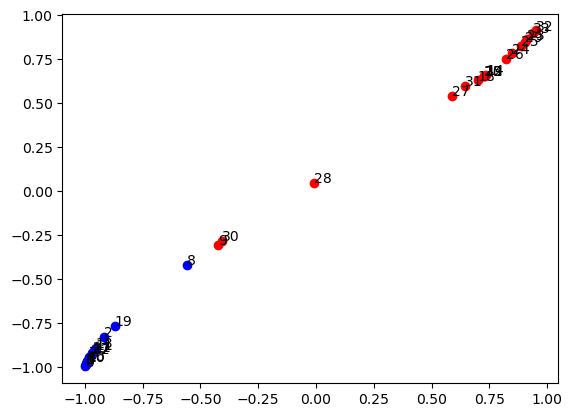

クラスタリング結果


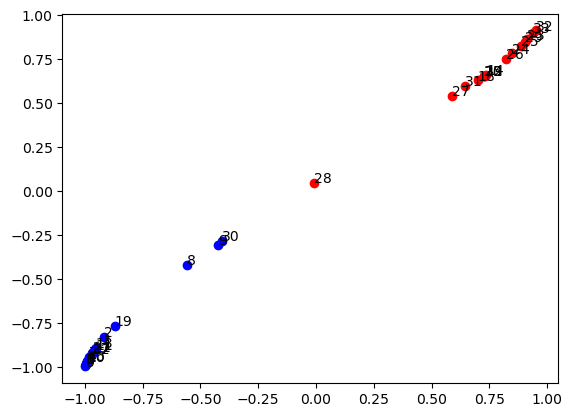

39回目 ARI : 0.7717250324254216
===========================40回目============================
埋め込み結果


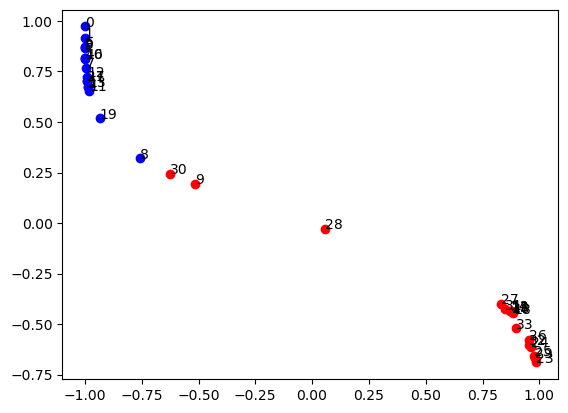

クラスタリング結果


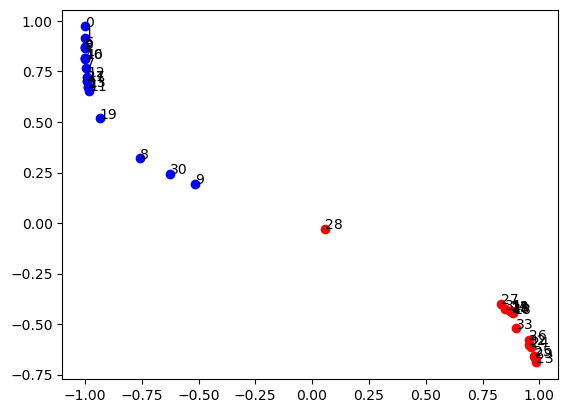

40回目 ARI : 0.7717250324254216
===========================41回目============================
埋め込み結果


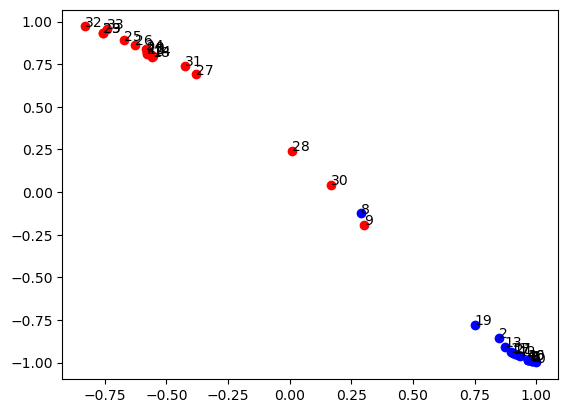

クラスタリング結果


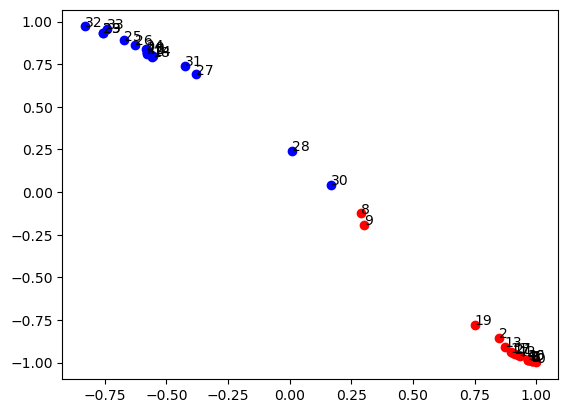

41回目 ARI : 0.8822575413558222
===========================42回目============================
埋め込み結果


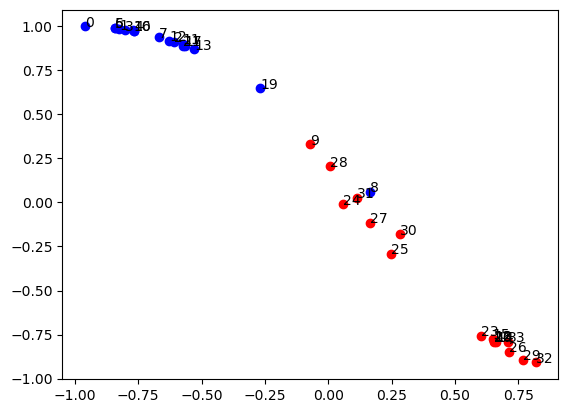

クラスタリング結果


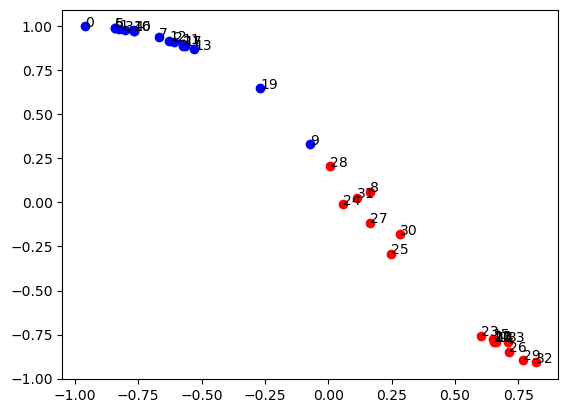

42回目 ARI : 0.7716262975778547
===========================43回目============================
埋め込み結果


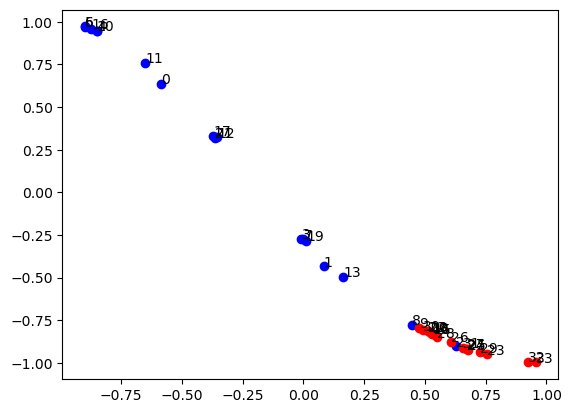

クラスタリング結果


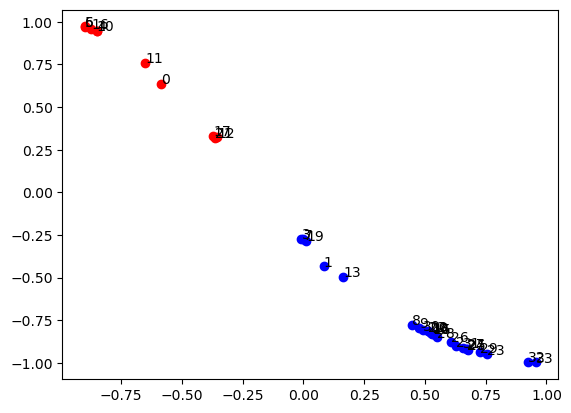

43回目 ARI : 0.3291384317521781
===========================44回目============================
埋め込み結果


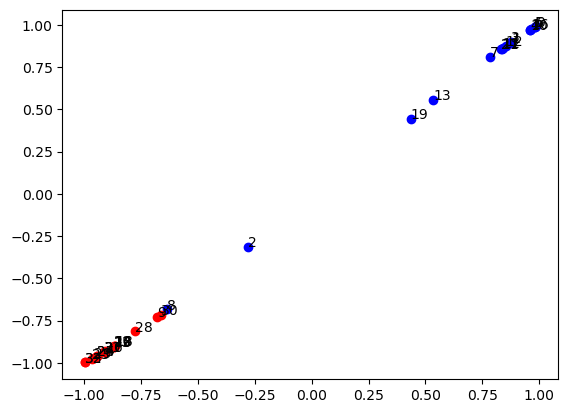

クラスタリング結果


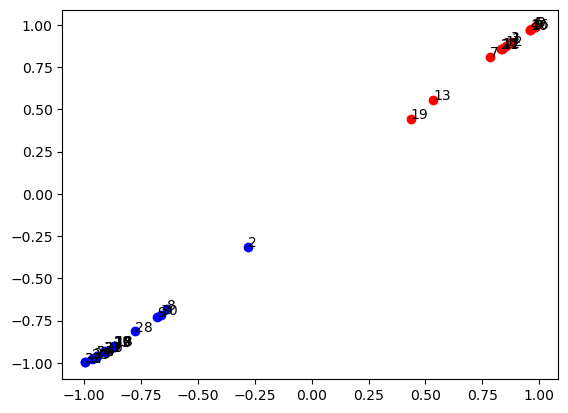

44回目 ARI : 0.7717250324254216
===========================45回目============================
埋め込み結果


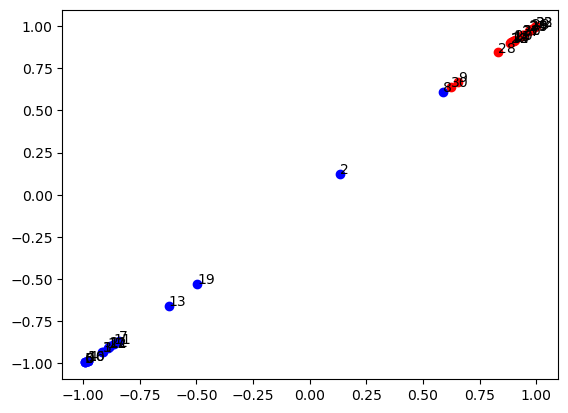

クラスタリング結果


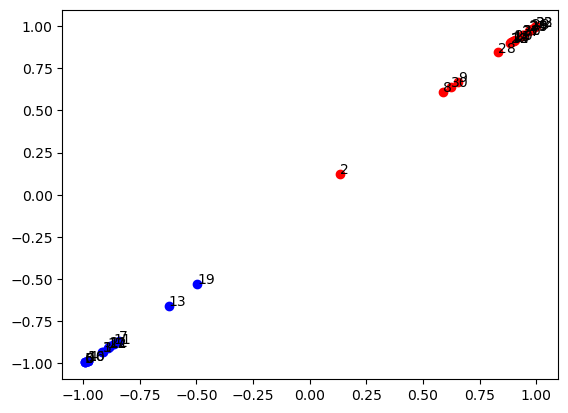

45回目 ARI : 0.7717250324254216
===========================46回目============================
埋め込み結果


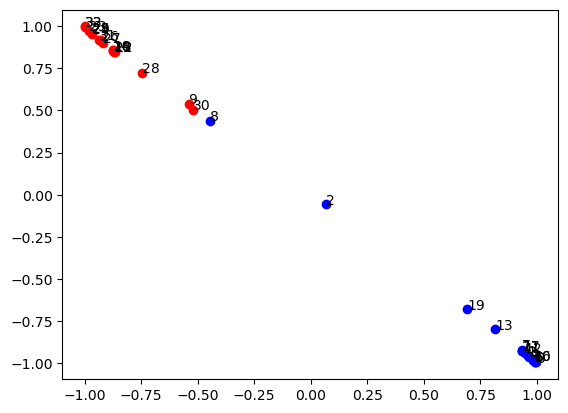

クラスタリング結果


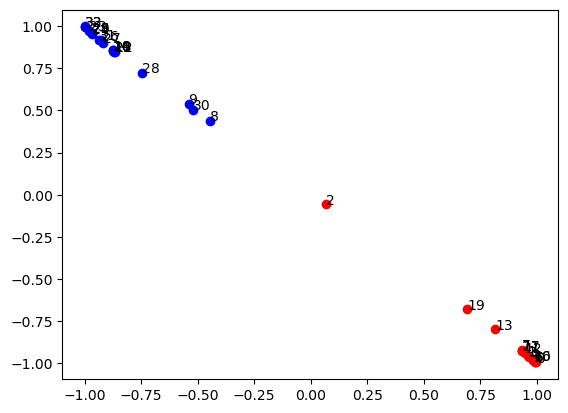

46回目 ARI : 0.8822575413558222
===========================47回目============================
埋め込み結果


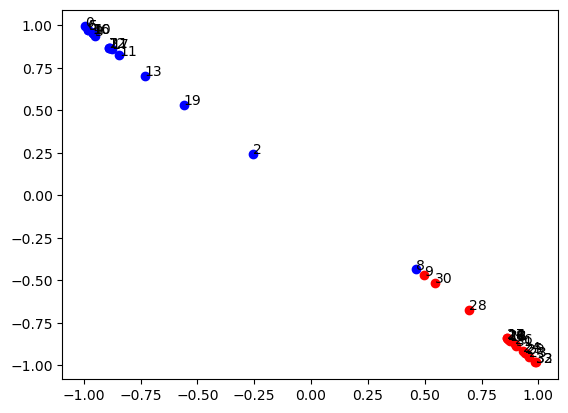

クラスタリング結果


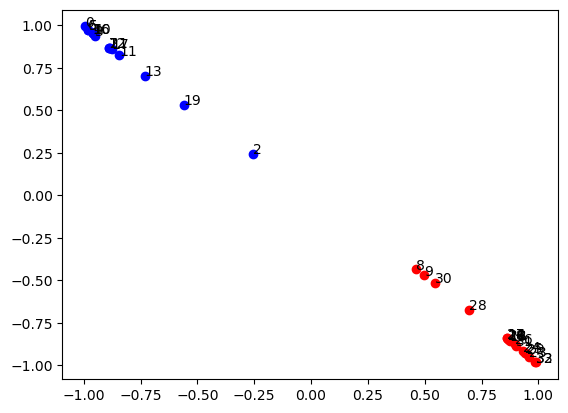

47回目 ARI : 0.8822575413558222
===========================48回目============================
埋め込み結果


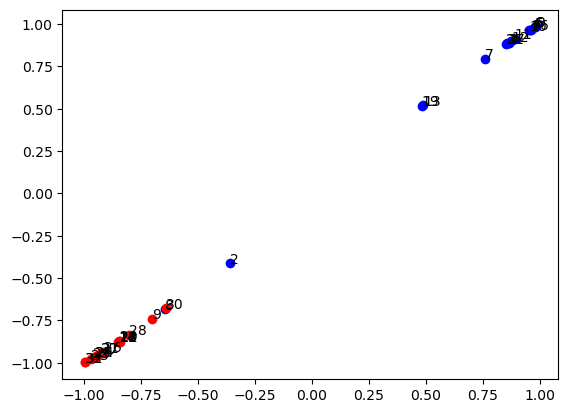

クラスタリング結果


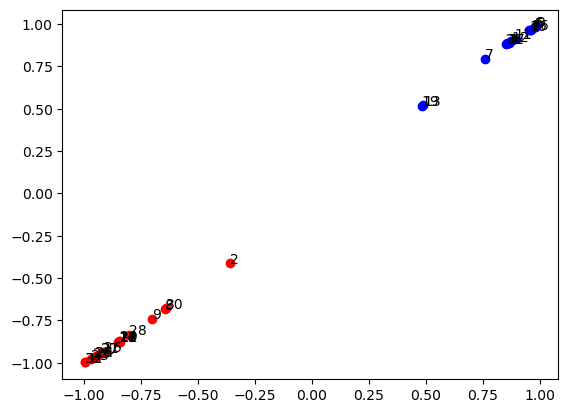

48回目 ARI : 0.7717250324254216
===========================49回目============================
埋め込み結果


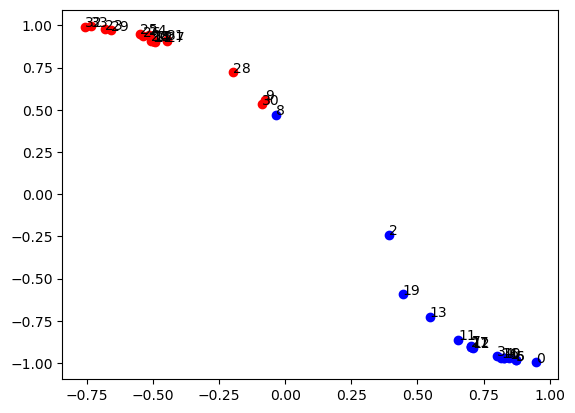

クラスタリング結果


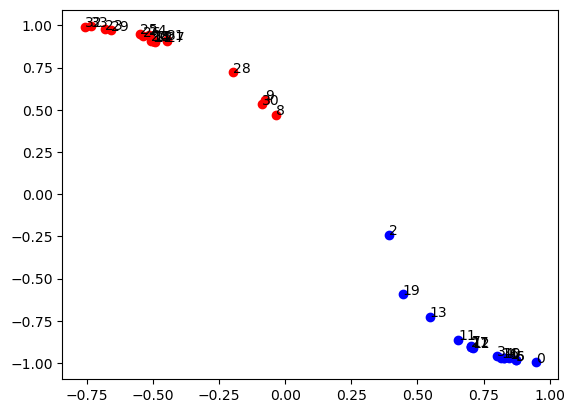

49回目 ARI : 0.8822575413558222
===========================50回目============================
埋め込み結果


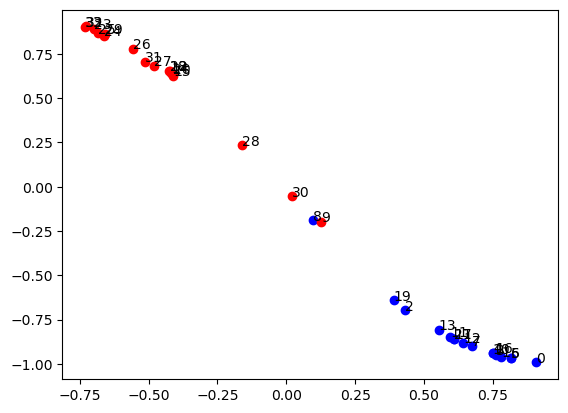

クラスタリング結果


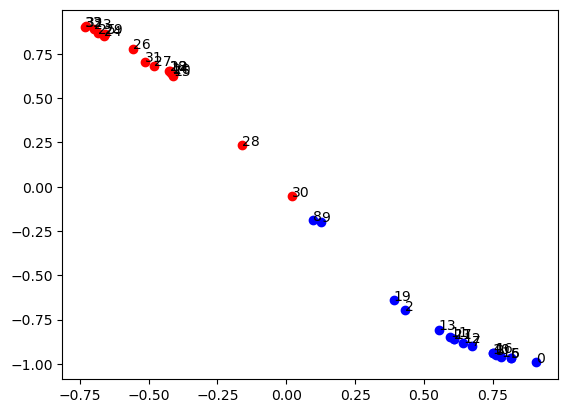

50回目 ARI : 0.8822575413558222
===========================51回目============================
埋め込み結果


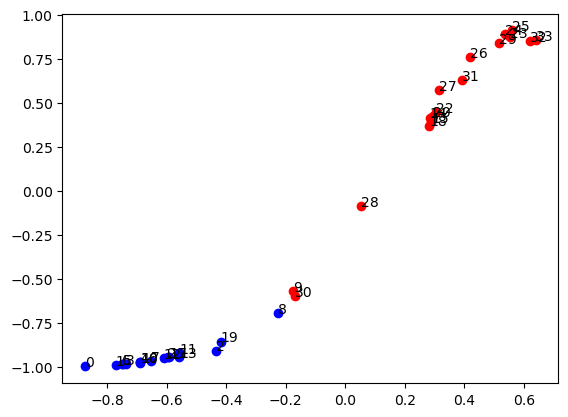

クラスタリング結果


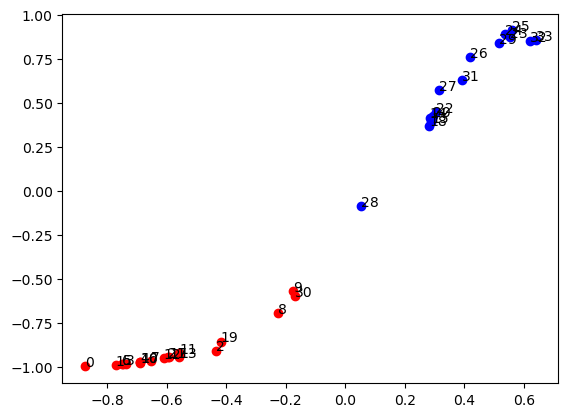

51回目 ARI : 0.7717250324254216
===========================52回目============================
埋め込み結果


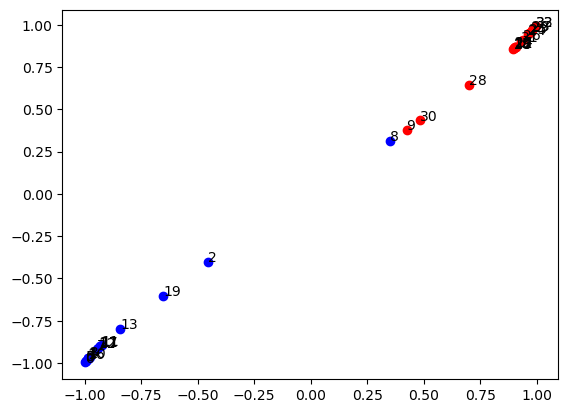

クラスタリング結果


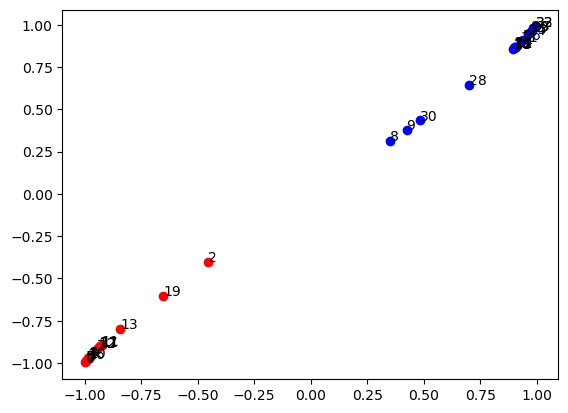

52回目 ARI : 0.8822575413558222
===========================53回目============================
埋め込み結果


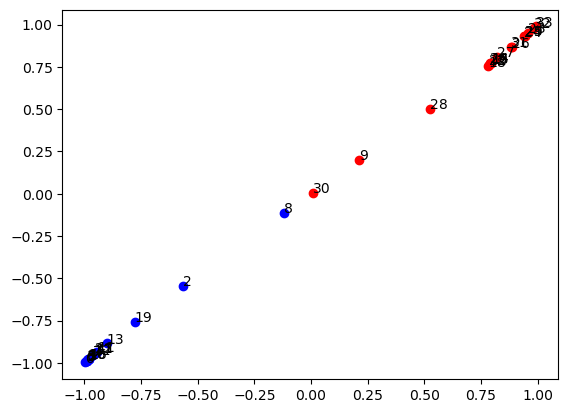

クラスタリング結果


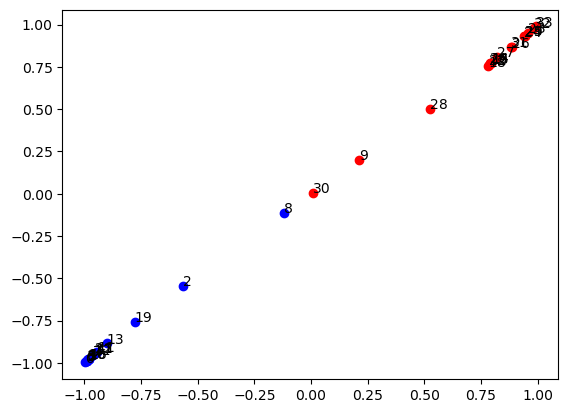

53回目 ARI : 1.0
===========================54回目============================
埋め込み結果


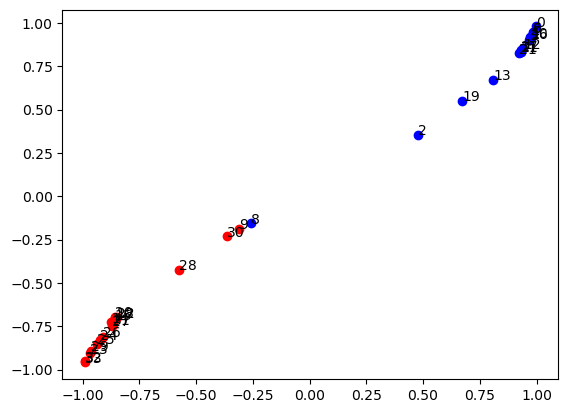

クラスタリング結果


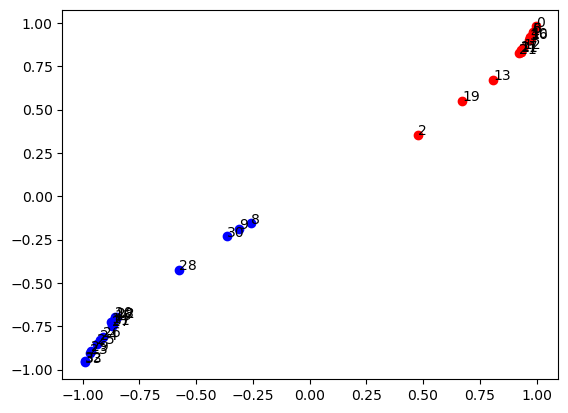

54回目 ARI : 0.8822575413558222
===========================55回目============================
埋め込み結果


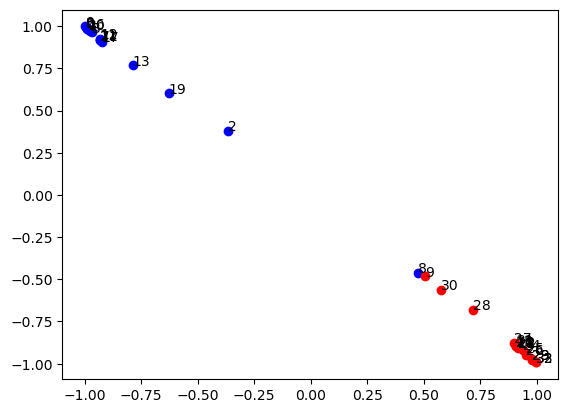

クラスタリング結果


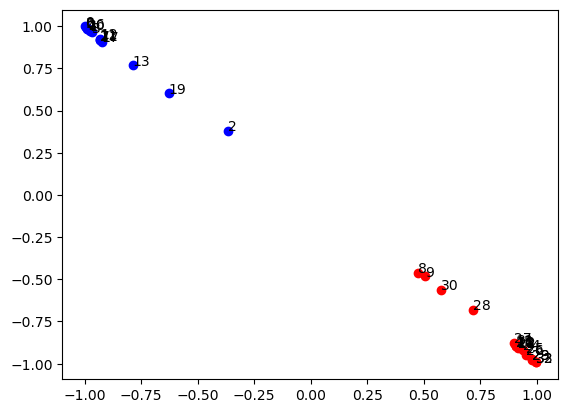

55回目 ARI : 0.8822575413558222
===========================56回目============================
埋め込み結果


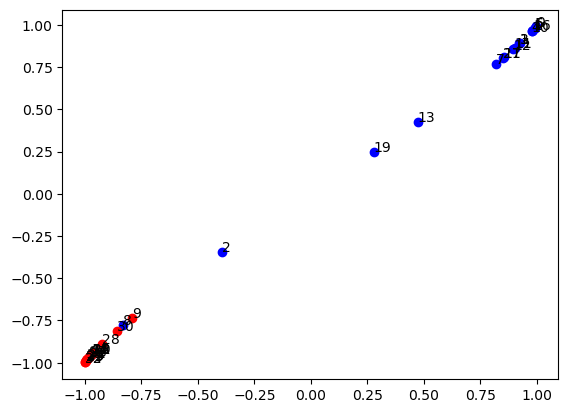

クラスタリング結果


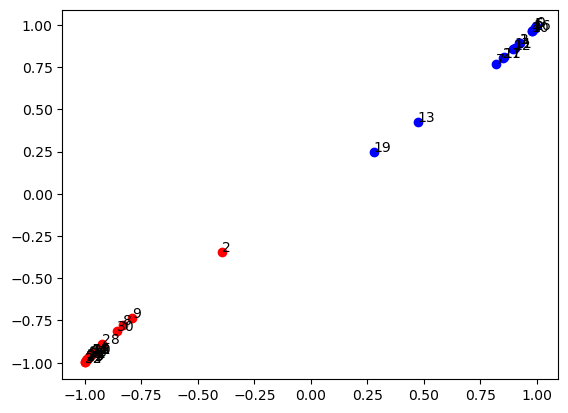

56回目 ARI : 0.7717250324254216
===========================57回目============================
埋め込み結果


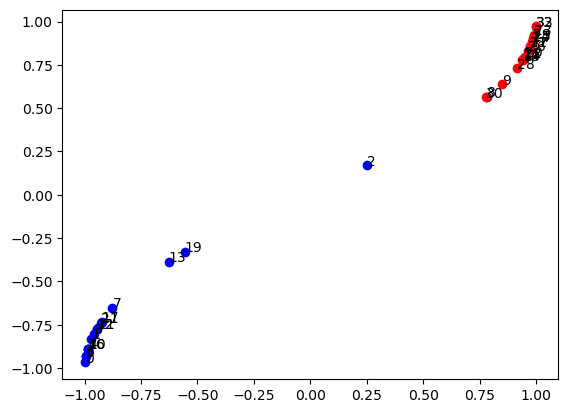

クラスタリング結果


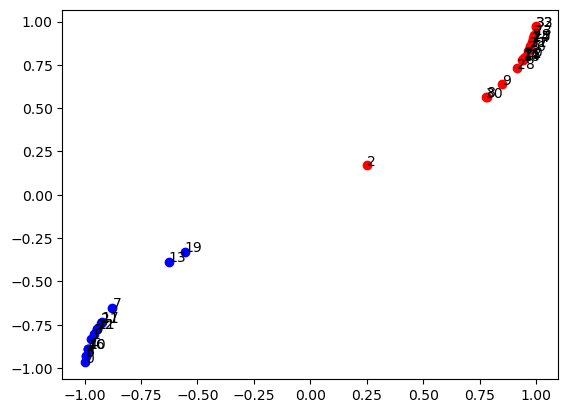

57回目 ARI : 0.7717250324254216
===========================58回目============================
埋め込み結果


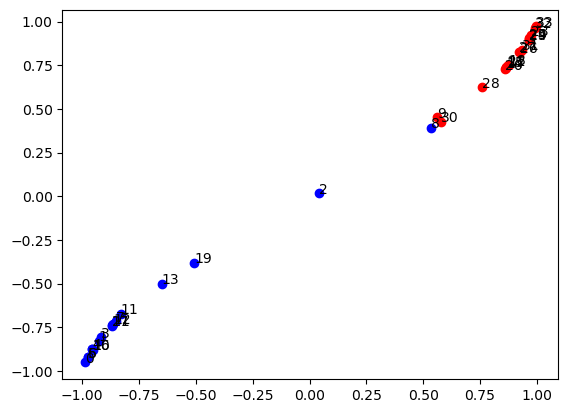

クラスタリング結果


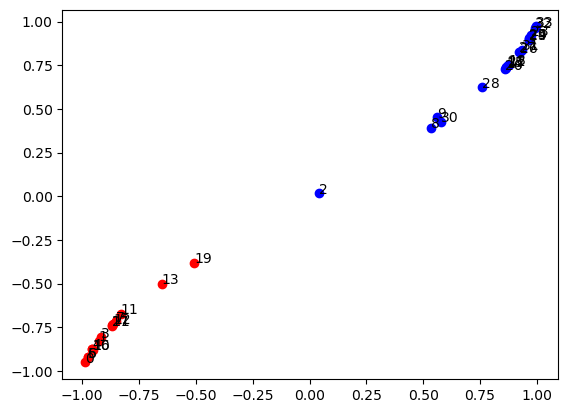

58回目 ARI : 0.7717250324254216
===========================59回目============================
埋め込み結果


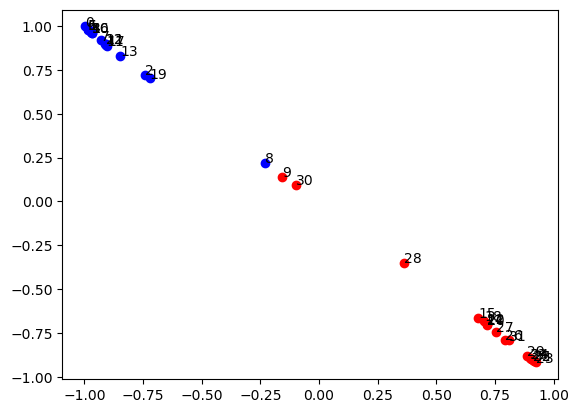

クラスタリング結果


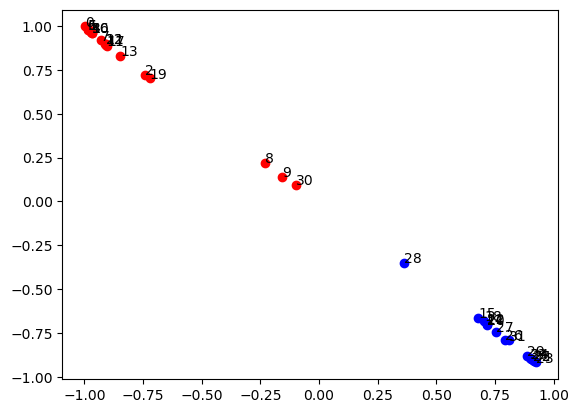

59回目 ARI : 0.7717250324254216
===========================60回目============================
埋め込み結果


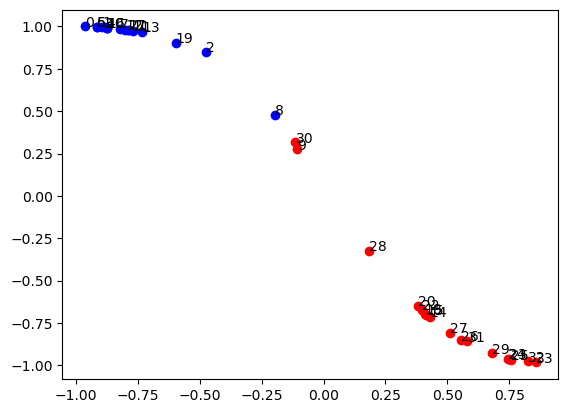

クラスタリング結果


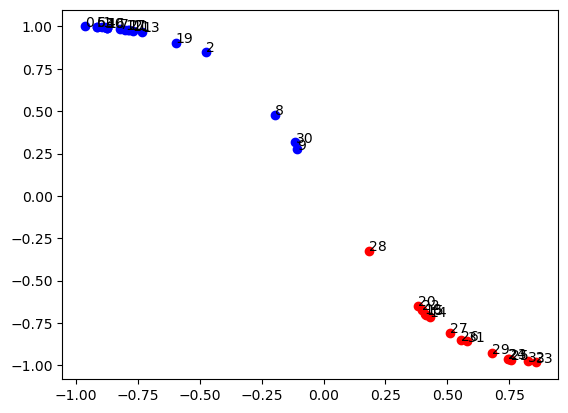

60回目 ARI : 0.7717250324254216
===========================61回目============================
埋め込み結果


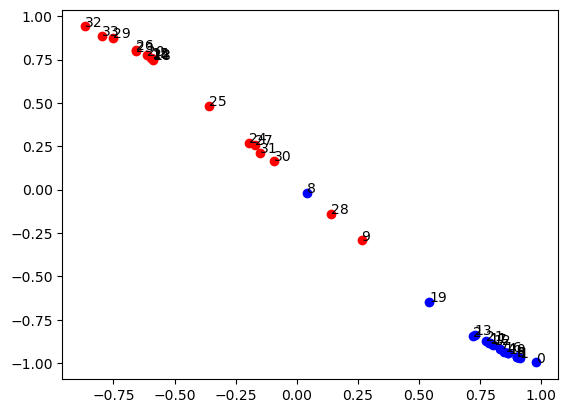

クラスタリング結果


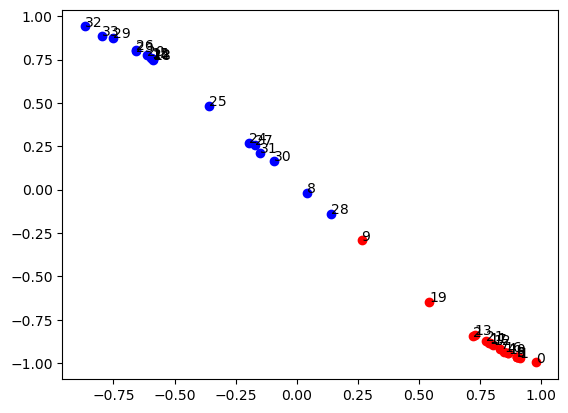

61回目 ARI : 0.7716262975778547
===========================62回目============================
埋め込み結果


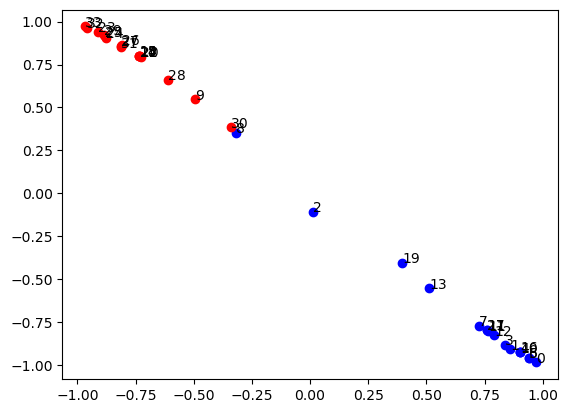

クラスタリング結果


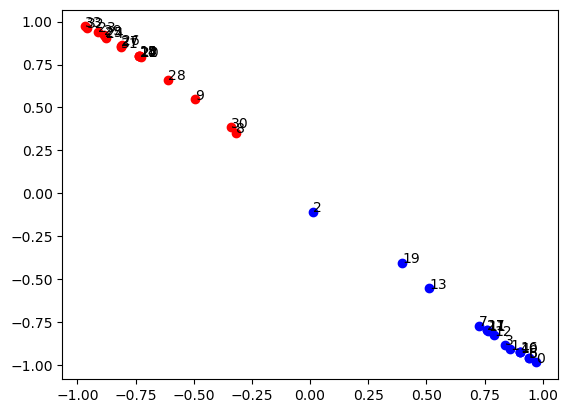

62回目 ARI : 0.8822575413558222
===========================63回目============================
埋め込み結果


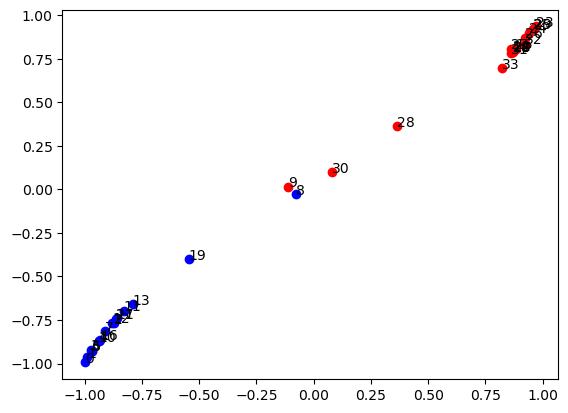

クラスタリング結果


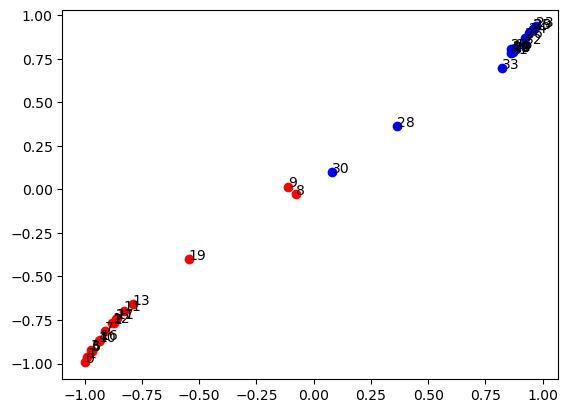

63回目 ARI : 0.8822575413558222
===========================64回目============================
埋め込み結果


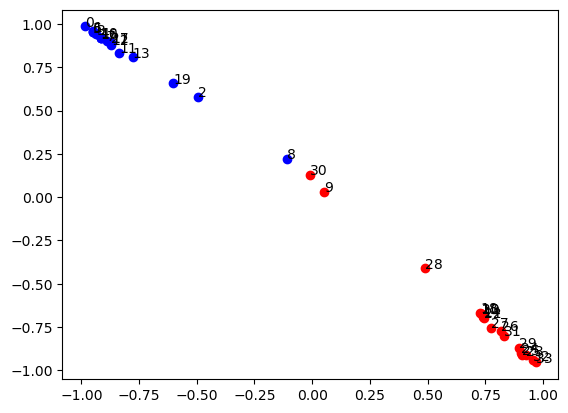

クラスタリング結果


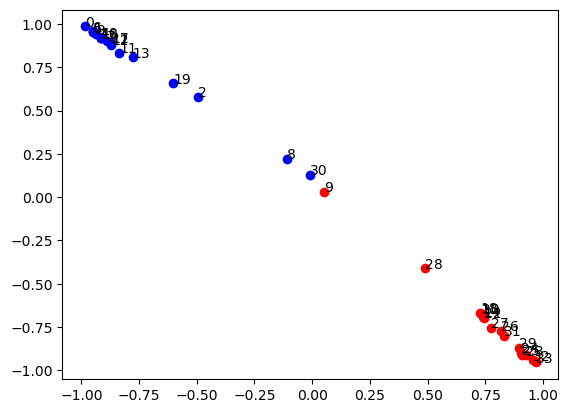

64回目 ARI : 0.8822575413558222
===========================65回目============================
埋め込み結果


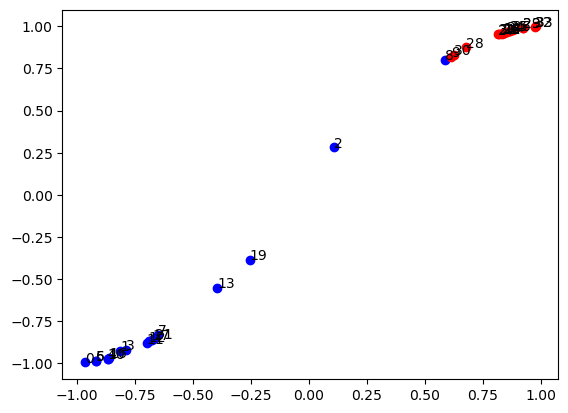

クラスタリング結果


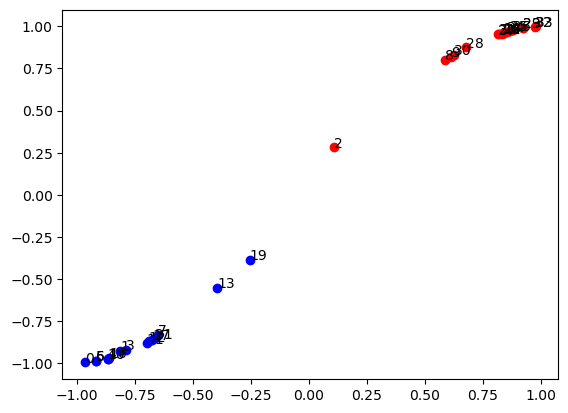

65回目 ARI : 0.7717250324254216
===========================66回目============================
埋め込み結果


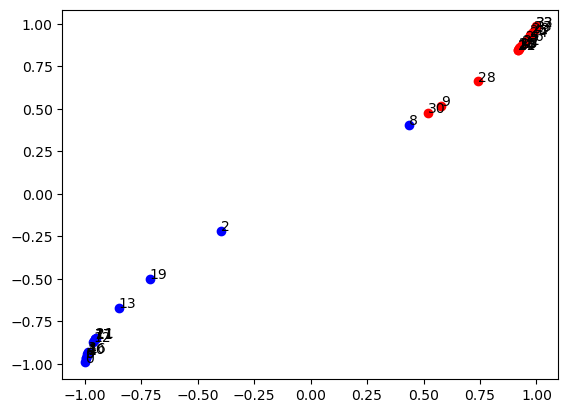

クラスタリング結果


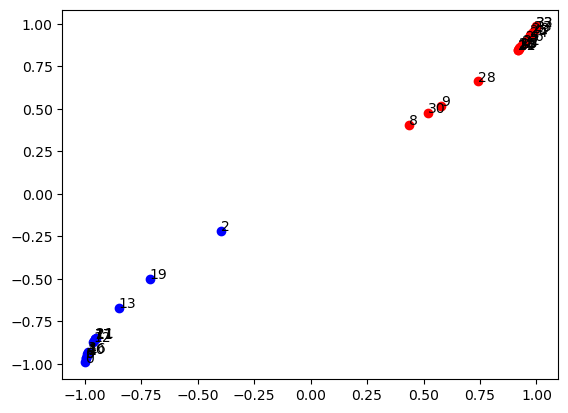

66回目 ARI : 0.8822575413558222
===========================67回目============================
埋め込み結果


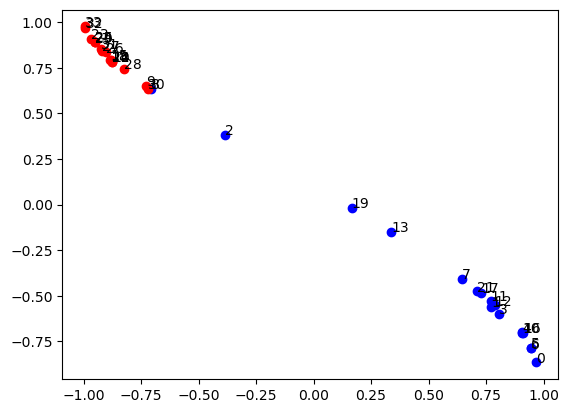

クラスタリング結果


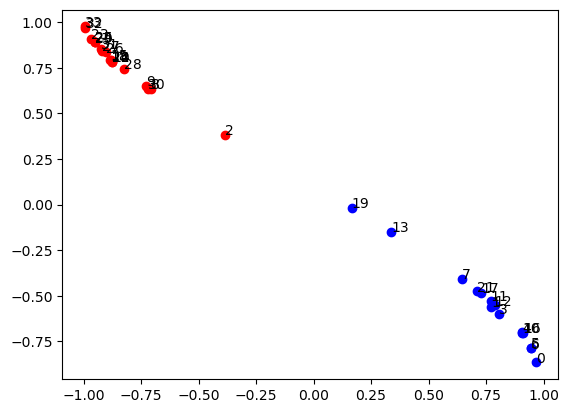

67回目 ARI : 0.7717250324254216
===========================68回目============================
埋め込み結果


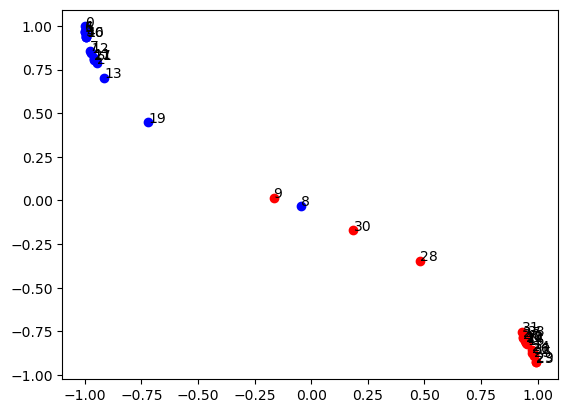

クラスタリング結果


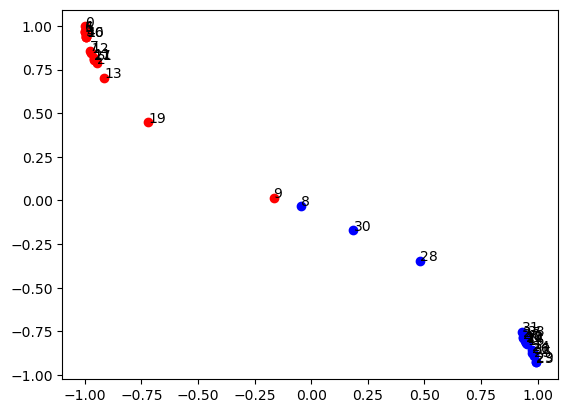

68回目 ARI : 0.7716262975778547
===========================69回目============================
埋め込み結果


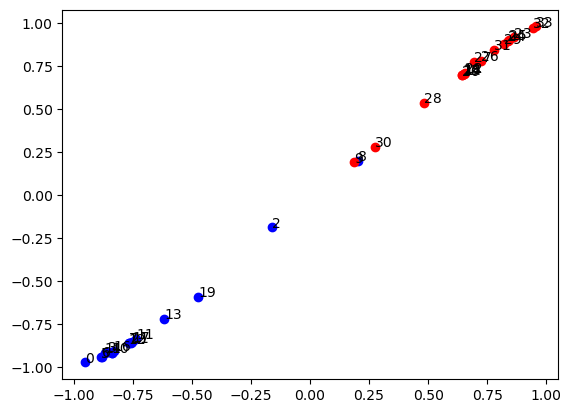

クラスタリング結果


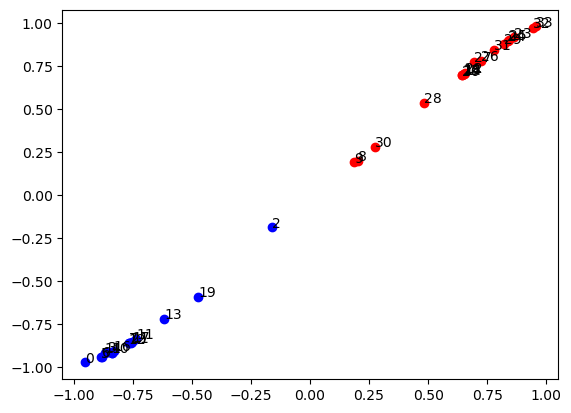

69回目 ARI : 0.8822575413558222
===========================70回目============================
埋め込み結果


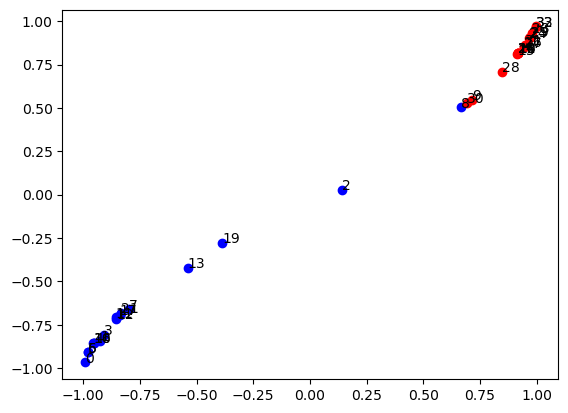

クラスタリング結果


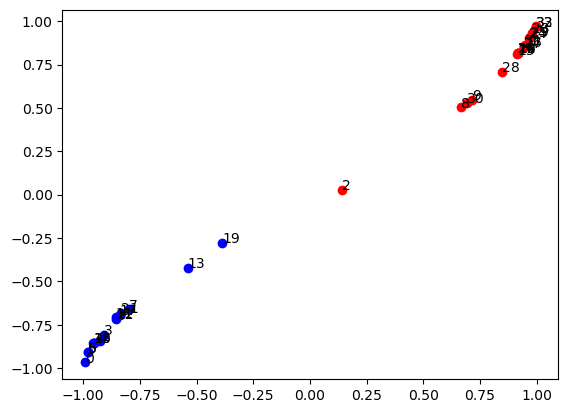

70回目 ARI : 0.7717250324254216
===========================71回目============================
埋め込み結果


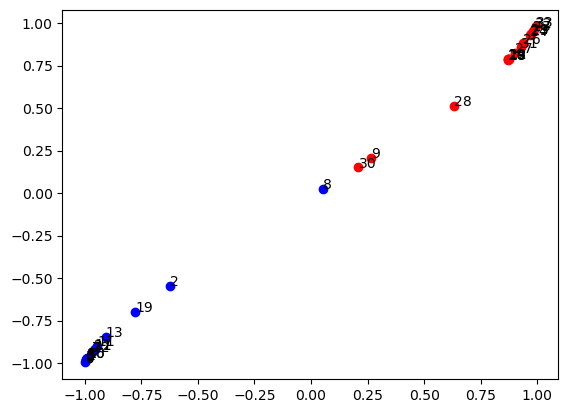

クラスタリング結果


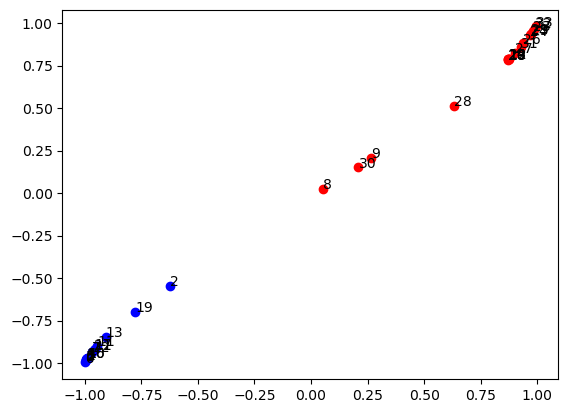

71回目 ARI : 0.8822575413558222
===========================72回目============================
埋め込み結果


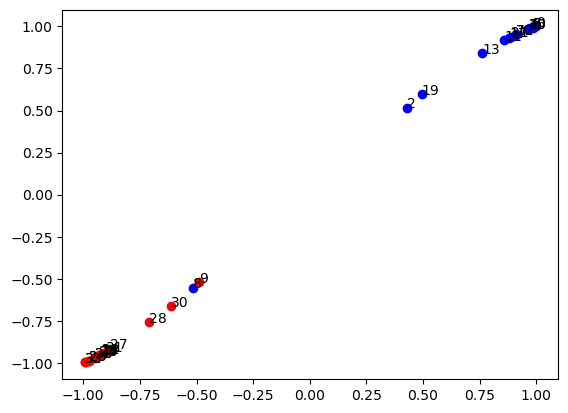

クラスタリング結果


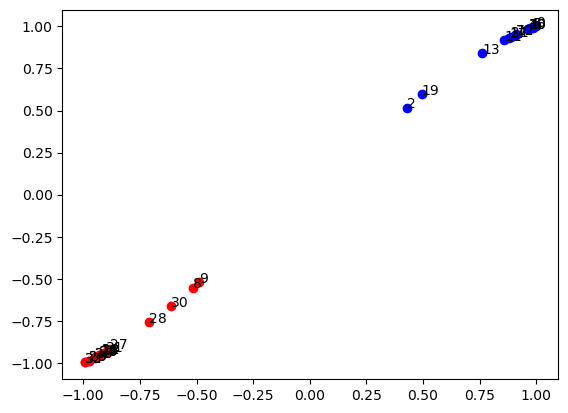

72回目 ARI : 0.8822575413558222
===========================73回目============================
埋め込み結果


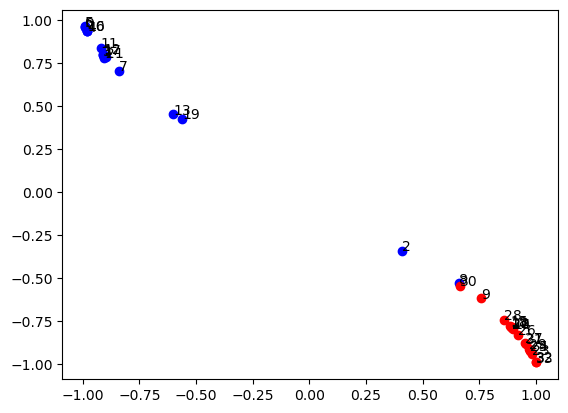

クラスタリング結果


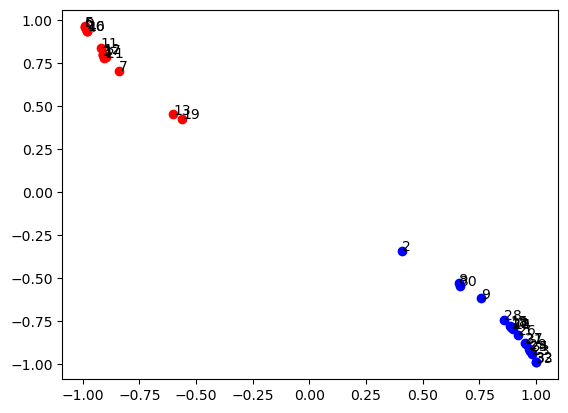

73回目 ARI : 0.7717250324254216
===========================74回目============================
埋め込み結果


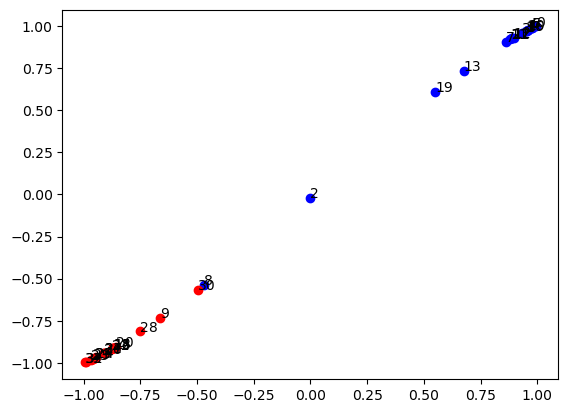

クラスタリング結果


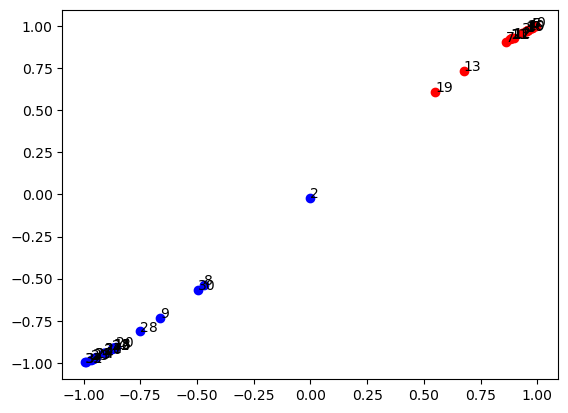

74回目 ARI : 0.7717250324254216
===========================75回目============================
埋め込み結果


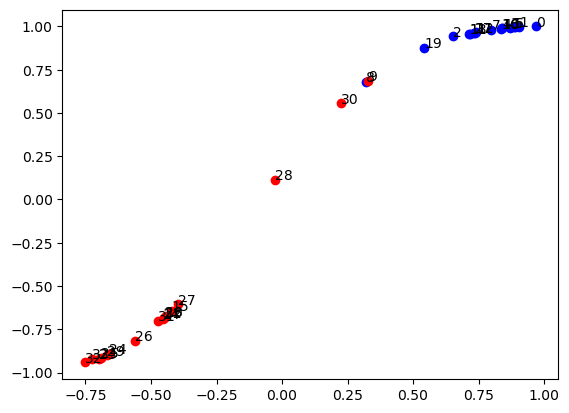

クラスタリング結果


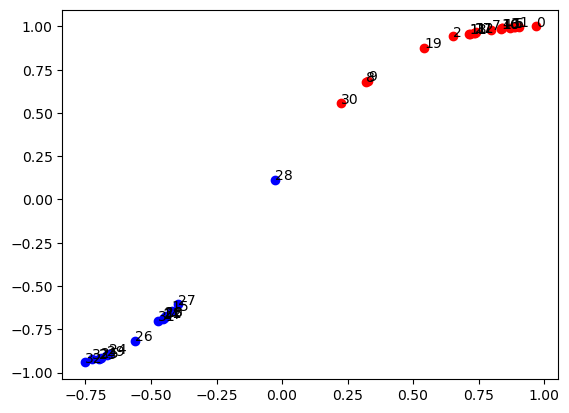

75回目 ARI : 0.7717250324254216
===========================76回目============================
埋め込み結果


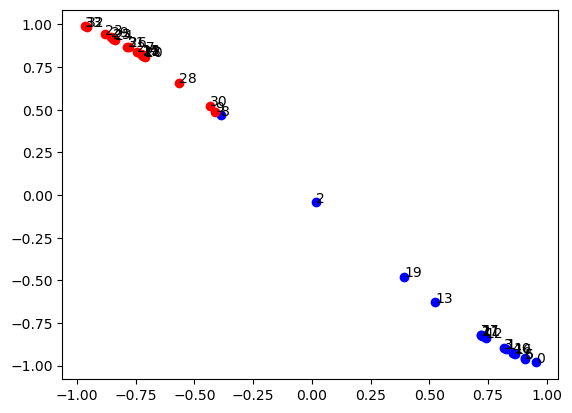

クラスタリング結果


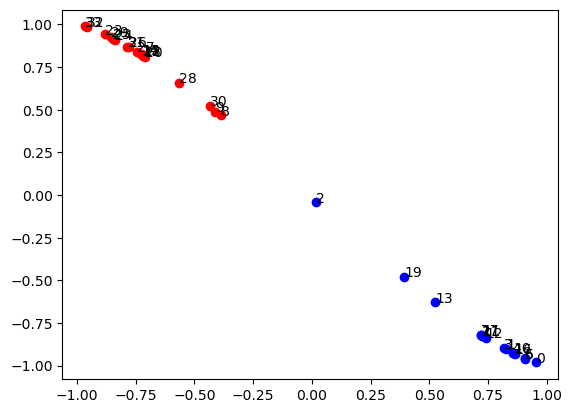

76回目 ARI : 0.8822575413558222
===========================77回目============================
埋め込み結果


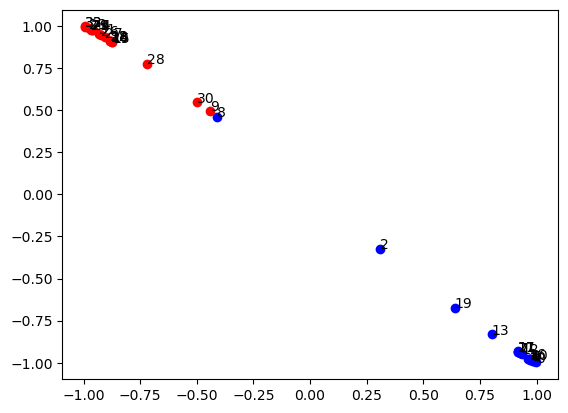

クラスタリング結果


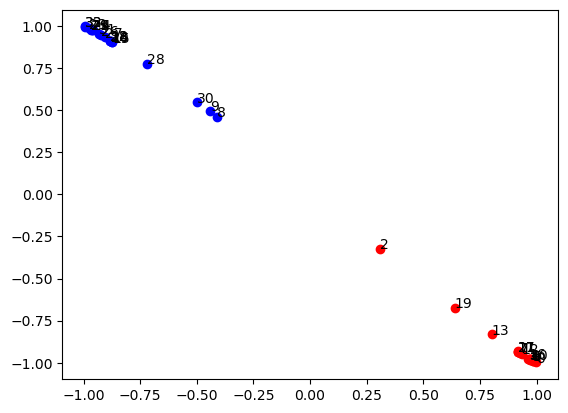

77回目 ARI : 0.8822575413558222
===========================78回目============================
埋め込み結果


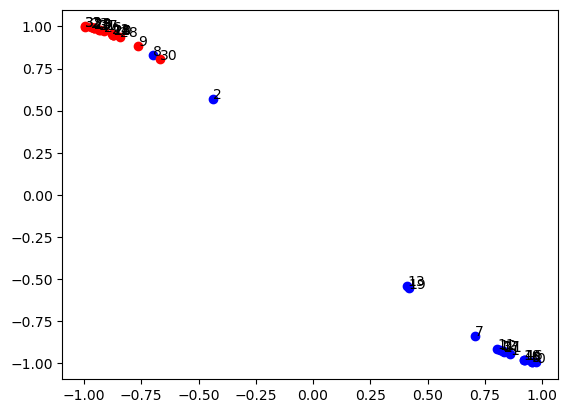

クラスタリング結果


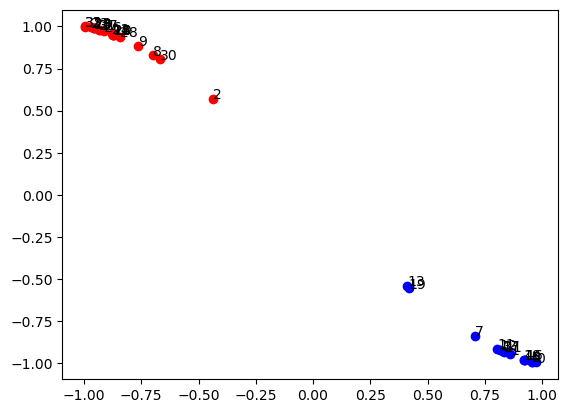

78回目 ARI : 0.7717250324254216
===========================79回目============================
埋め込み結果


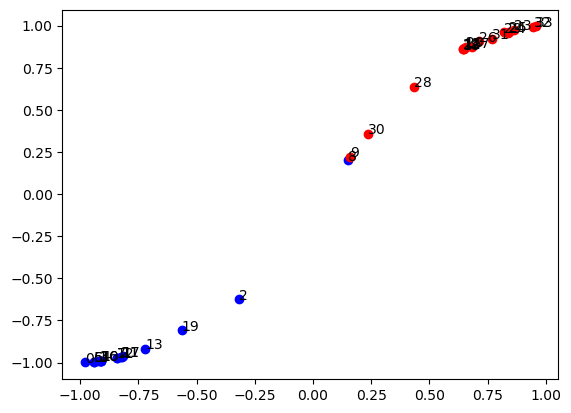

クラスタリング結果


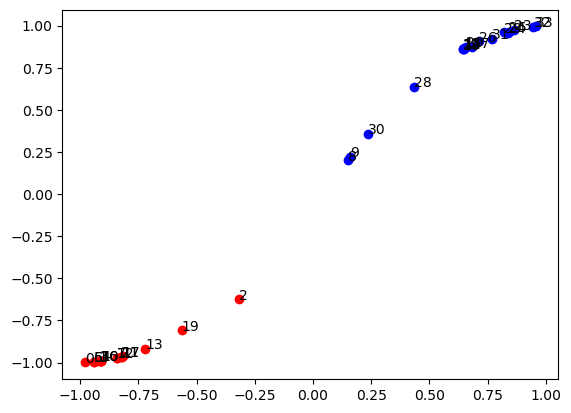

79回目 ARI : 0.8822575413558222
===========================80回目============================
埋め込み結果


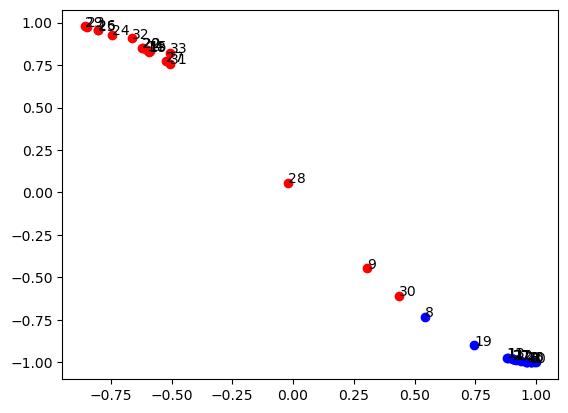

クラスタリング結果


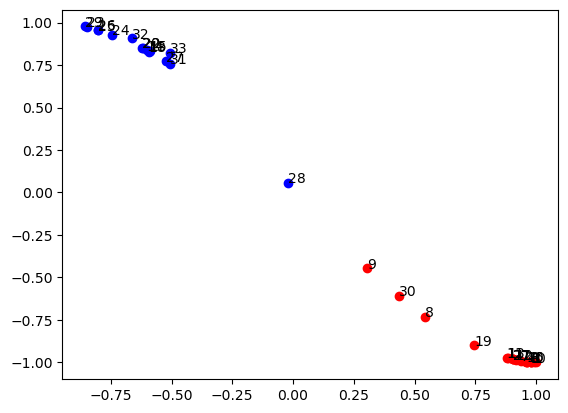

80回目 ARI : 0.7717250324254216
===========================81回目============================
埋め込み結果


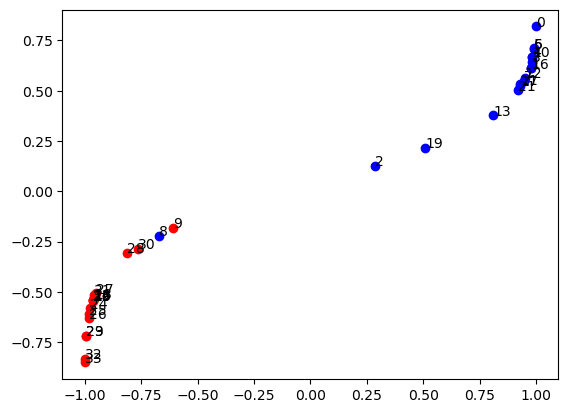

クラスタリング結果


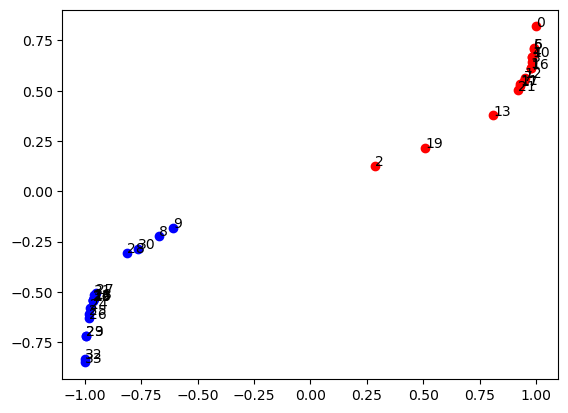

81回目 ARI : 0.8822575413558222
===========================82回目============================
埋め込み結果


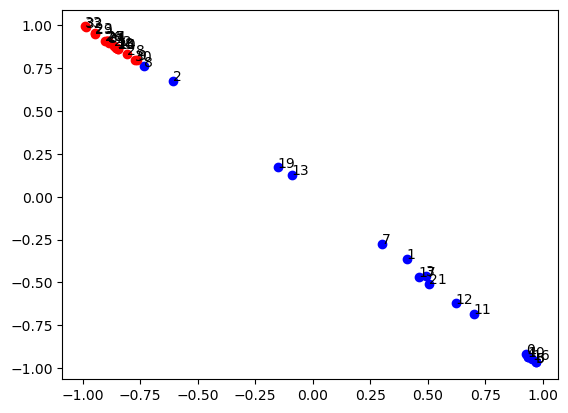

クラスタリング結果


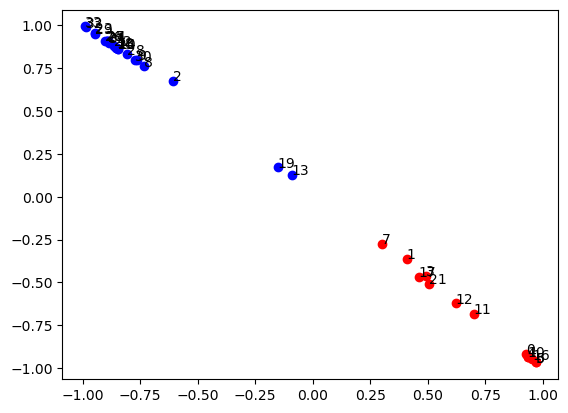

82回目 ARI : 0.572538860103627
===========================83回目============================
埋め込み結果


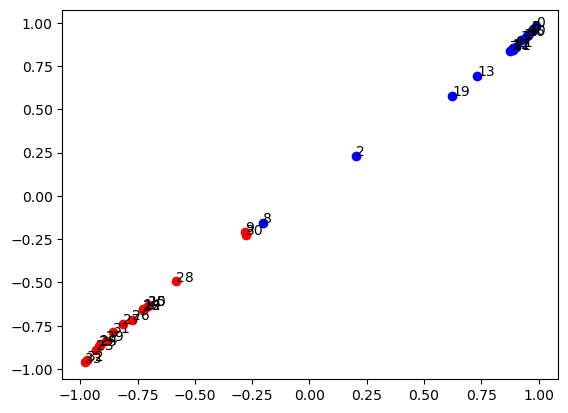

クラスタリング結果


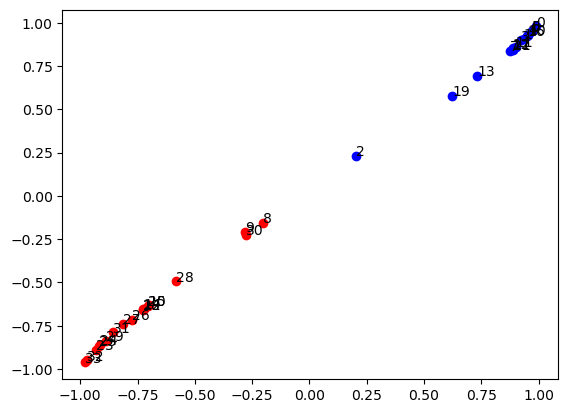

83回目 ARI : 0.8822575413558222
===========================84回目============================
埋め込み結果


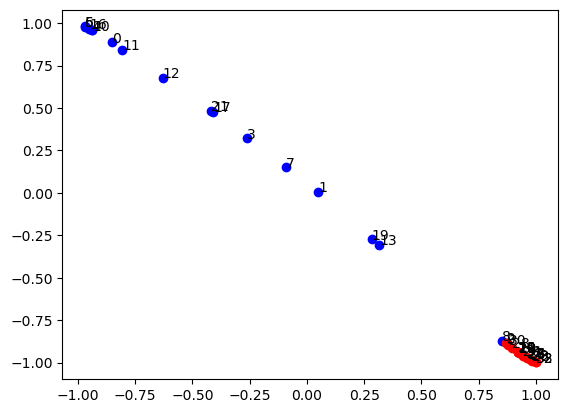

クラスタリング結果


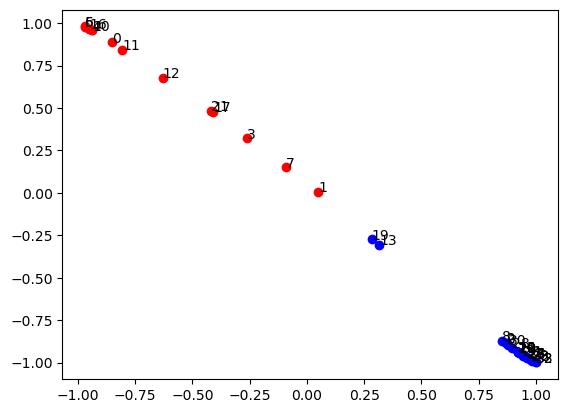

84回目 ARI : 0.572538860103627
===========================85回目============================
埋め込み結果


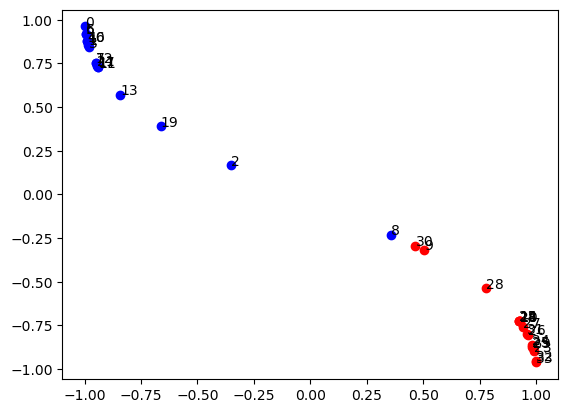

クラスタリング結果


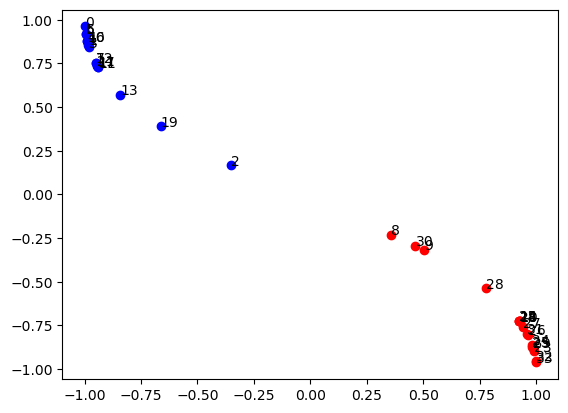

85回目 ARI : 0.8822575413558222
===========================86回目============================
埋め込み結果


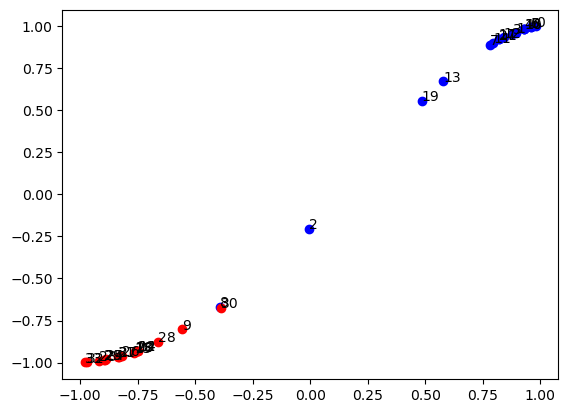

クラスタリング結果


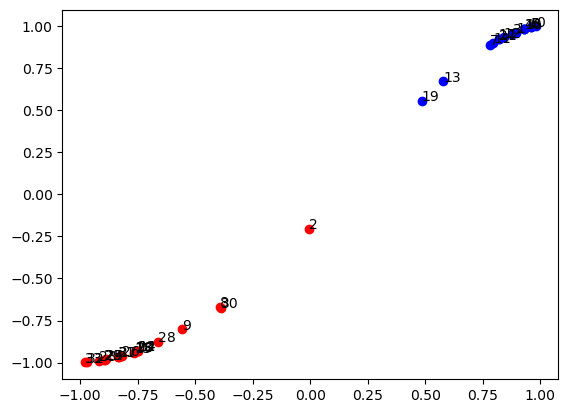

86回目 ARI : 0.7717250324254216
===========================87回目============================
埋め込み結果


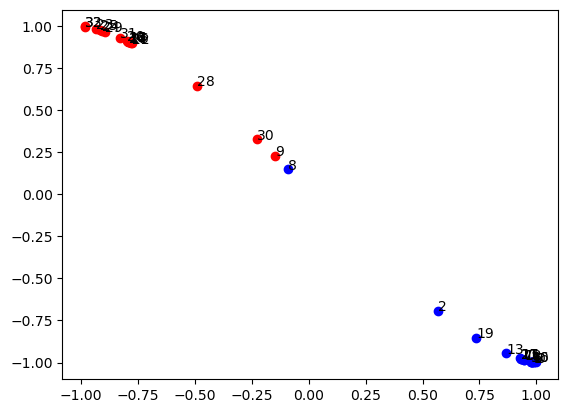

クラスタリング結果


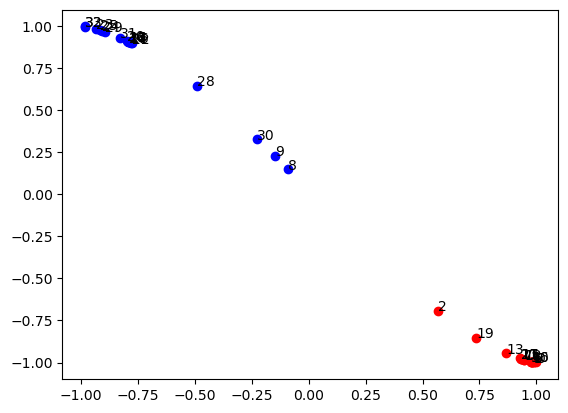

87回目 ARI : 0.8822575413558222
===========================88回目============================
埋め込み結果


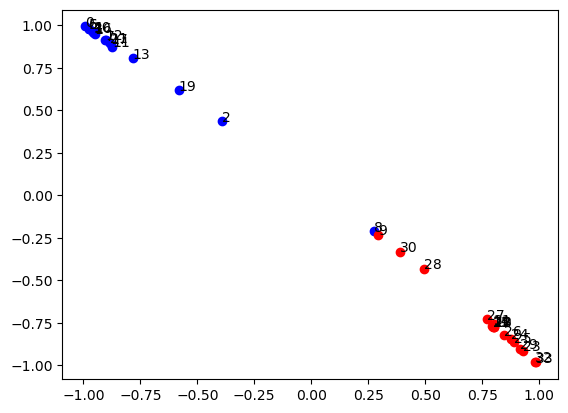

クラスタリング結果


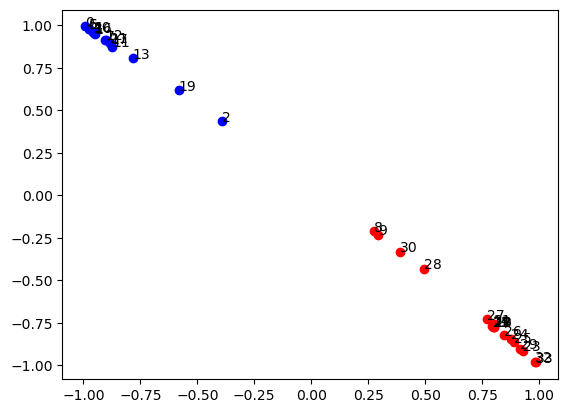

88回目 ARI : 0.8822575413558222
===========================89回目============================
埋め込み結果


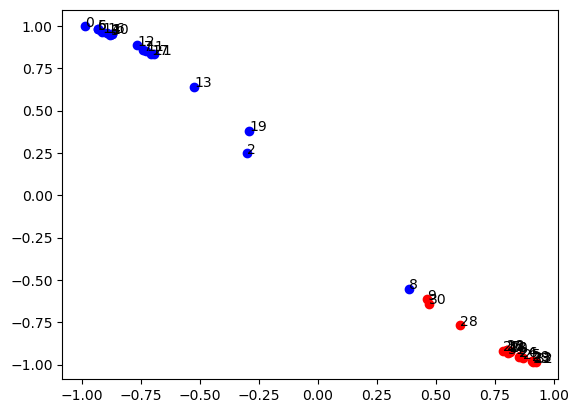

クラスタリング結果


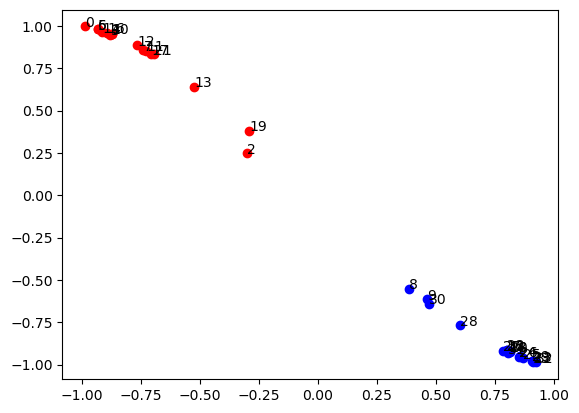

89回目 ARI : 0.8822575413558222
===========================90回目============================
埋め込み結果


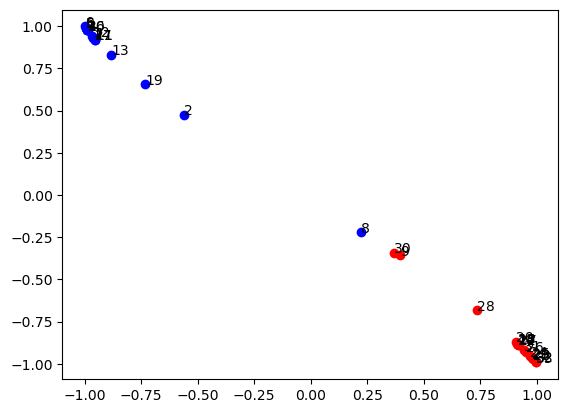

クラスタリング結果


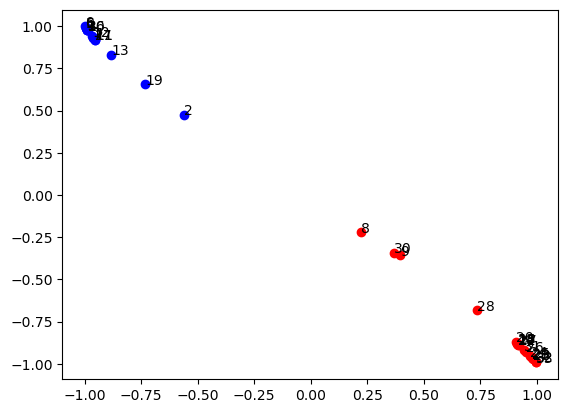

90回目 ARI : 0.8822575413558222
===========================91回目============================
埋め込み結果


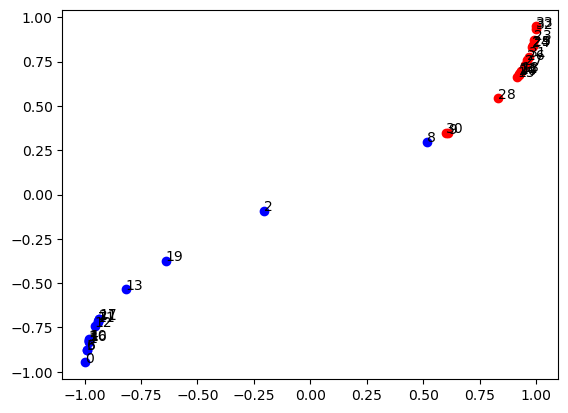

クラスタリング結果


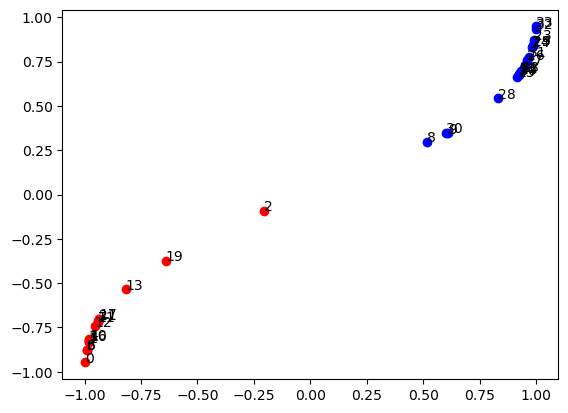

91回目 ARI : 0.8822575413558222
===========================92回目============================
埋め込み結果


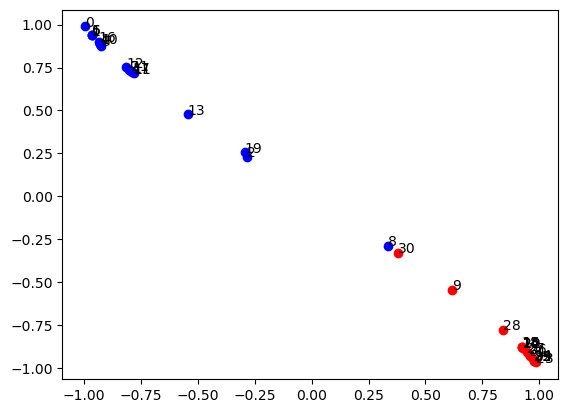

クラスタリング結果


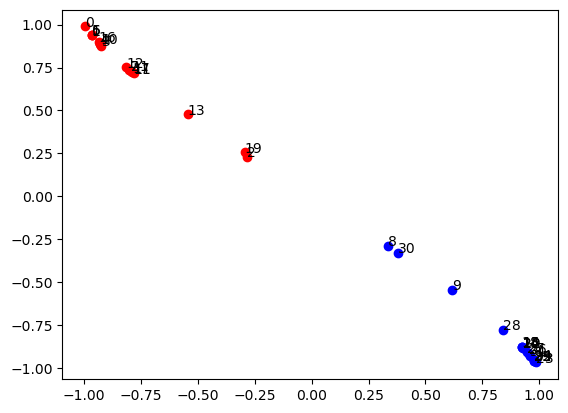

92回目 ARI : 0.8822575413558222
===========================93回目============================
埋め込み結果


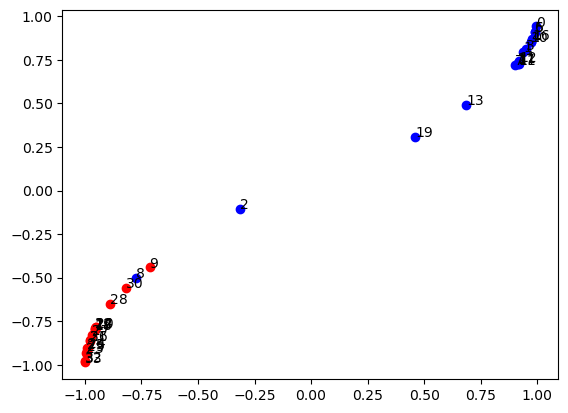

クラスタリング結果


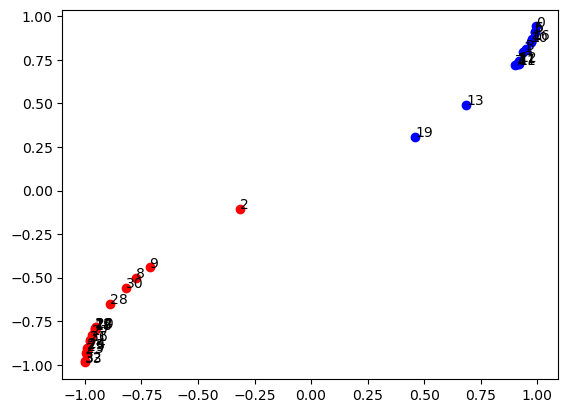

93回目 ARI : 0.7717250324254216
===========================94回目============================
埋め込み結果


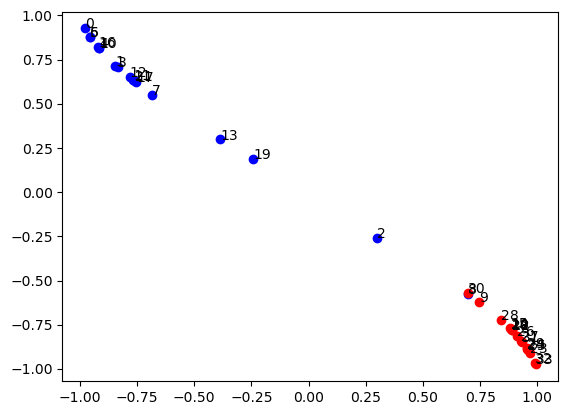

クラスタリング結果


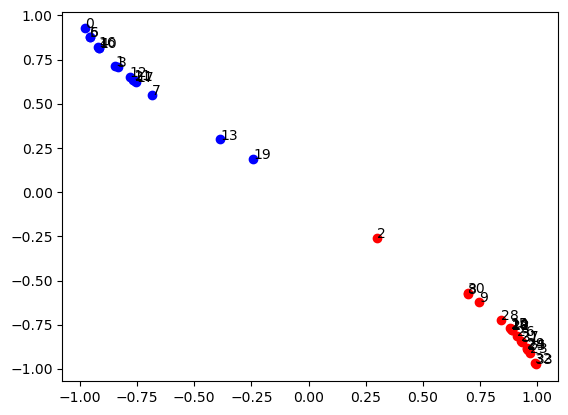

94回目 ARI : 0.7717250324254216
===========================95回目============================
埋め込み結果


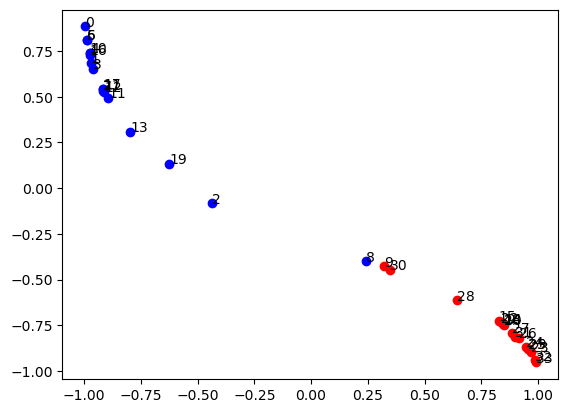

クラスタリング結果


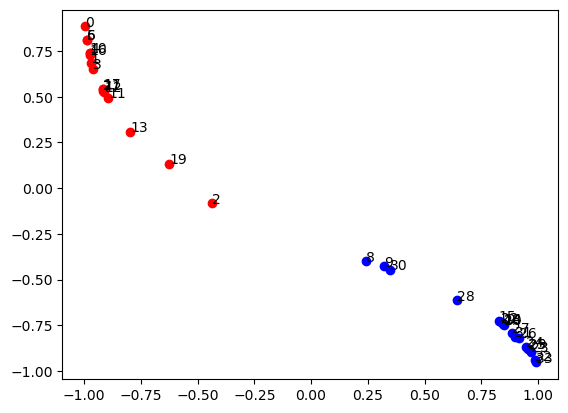

95回目 ARI : 0.8822575413558222
===========================96回目============================
埋め込み結果


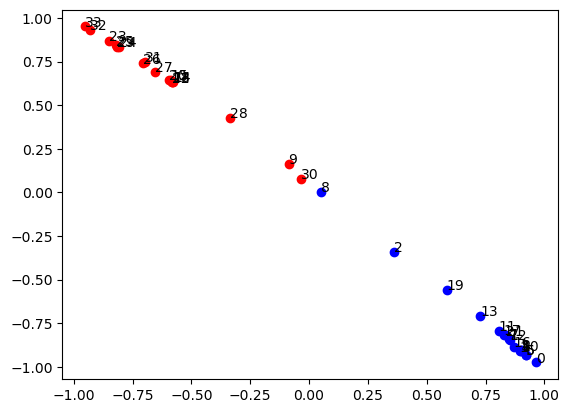

クラスタリング結果


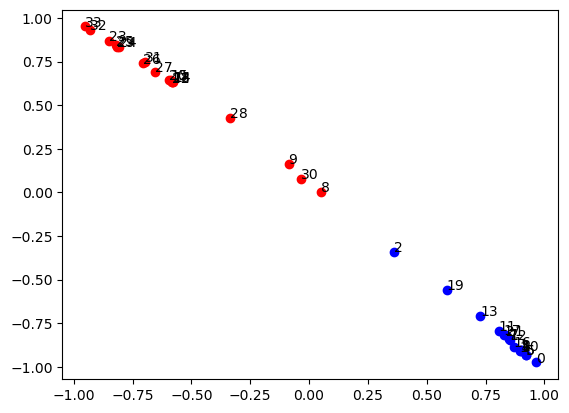

96回目 ARI : 0.8822575413558222
===========================97回目============================
埋め込み結果


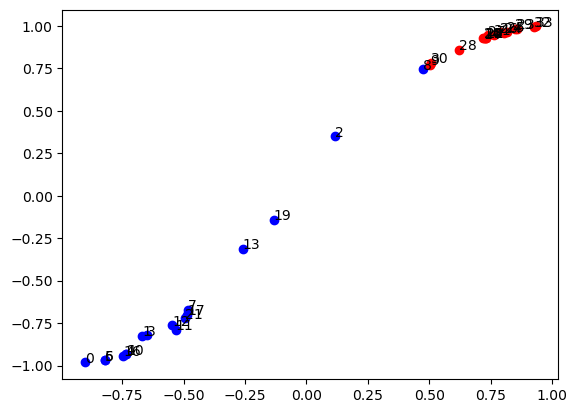

クラスタリング結果


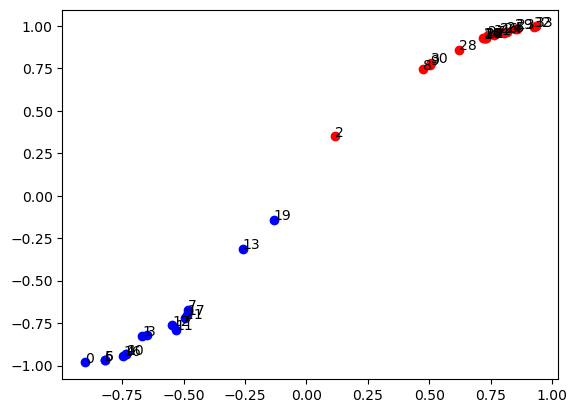

97回目 ARI : 0.7717250324254216
===========================98回目============================
埋め込み結果


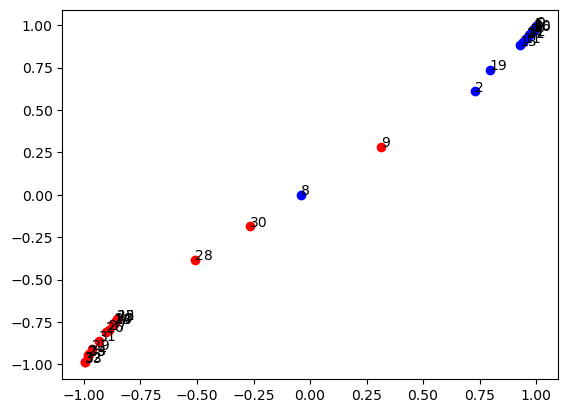

クラスタリング結果


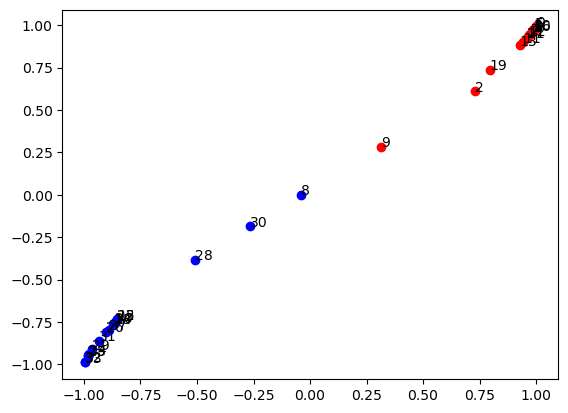

98回目 ARI : 0.7716262975778547
===========================99回目============================
埋め込み結果


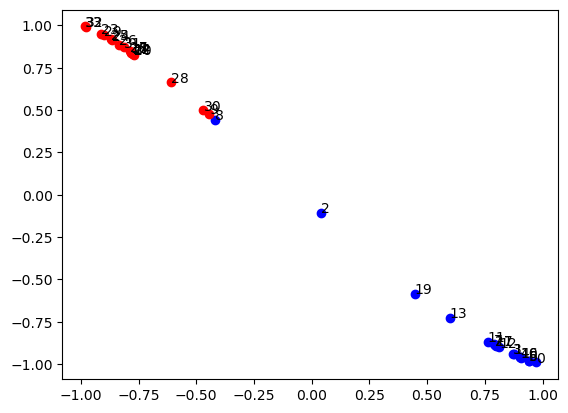

クラスタリング結果


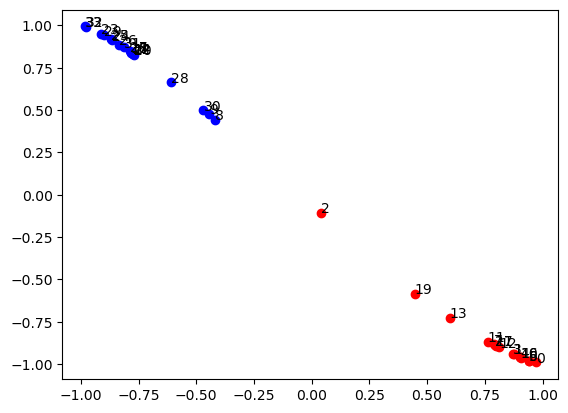

99回目 ARI : 0.8822575413558222
===========================100回目============================
埋め込み結果


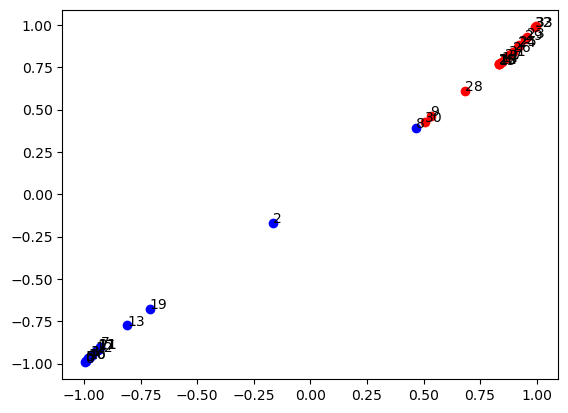

クラスタリング結果


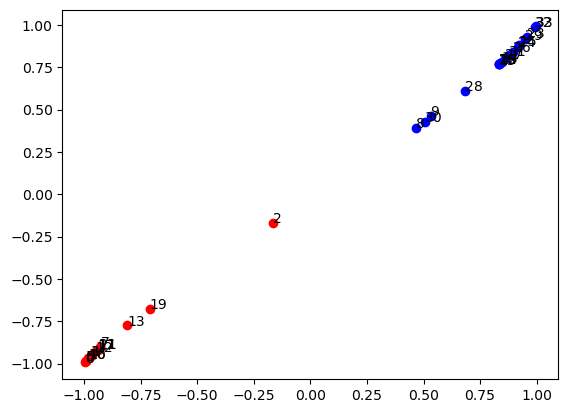

100回目 ARI : 0.8822575413558222
最大ARI([53]回目実行) : 1.0
最小ARI([7, 43]回目実行) : 0.3291384317521781
平均ARI : 0.8111920216062117
標準偏差 : 0.10072748851293341


In [4]:

ARI_list, max_EVM, min_EVM, max_pred, min_pred = gcn.exec_to_kmedoids(TIMES, TRAIN_ALL, DEFAULT, NUM_TRAIN, EPOCH,VIEW_TRAIN, VIEW_CLUSTERING, N_CLUSTER, TRUE_LABEL, METHOD, DATA)



In [5]:
# ARIが最大だった時のベクトルをcsvとして書き込む
#max_EVM = max_EVM.detach().numpy()

with open(f'gcn_karateclub_NUM_TRAIN-{NUM_TRAIN}_EPOCH-{EPOCH}.csv', 'w') as f:
    for i in range(len(max_EVM)):
        f.write(f"{max_EVM[i][0]},{max_EVM[i][1]}\n")
